<div style="font-size:130%">

**From Browsing to Purchase: Optimizing E-commerce with Intelligent Product Recommendations** <br>
Author - Mahesh Raut (mraut@uoguelph.ca) <br>
CIS\*6020 - University of Guelph 

This project notebook examines the ecommerce industry by analyzing data, available on [Kaggle](https://www.kaggle.com/datasets/carrie1/ecommerce-data/data). The goal is to design, build, and assess an e-commerce recommendation framework that excels in tuning into each user's unique preferences by grouping customers according to their purchase patterns, elevating the overall digital shopping journey. The choice of the K-means clustering algorithm is driven by its suitability for customer segmentation tasks. K-means is a widely recognized and powerful clustering method that can effectively group customers with similar buying patterns. By applying the K-means clustering algorithm, the project aims to segment customers into distinct categories, understanding their unique profiles and preferences. Building on this, a recommendation system is built to suggest popular products to customers within each group who have not yet purchased them, aiming to improve marketing efforts and increase sales.

# Table of Contents
    
* [Import Data](#data)
* [Exploring Data](#explore)  
* [Data Cleaning](#data_cleaning)
* [Feature Engineering](#feature_engineering) 
* [Outlier Detection and Treatment](#outlier_detection)
* [Correlation Analysis](#correlation)
* [Feature Scaling](#scaling)
* [Dimensionality Reduction](#pca)
* [Machine Learning -> K-Means Clustering](#kmeans) 
    - [Determining the Optimal Number of Clusters - Elbow & Silhouette](#optimal_k) 
    - [Clustering Model - K-means](#kmeans_model)
* [Clustering Evaluation](#evaluation)  
* [Cluster Analysis and Profiling](#profiling)
* [Recommendation System](#recommendation_system)
* [References](#references)

<a id="data"></a>
## Import Data

In [1]:
######### Import Libraries #########

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

In [2]:
# Read the ecommerce data file
df = pd.read_csv('data.csv', encoding="ISO-8859-1")

<a id="explore"></a>
# Exploring Data

In [3]:
# Print top 15 rows of ecommerce data
df.head(15)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [4]:
# Check data type 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


The dataset comprises 541,909 records and encompasses 8 columns, each with its specific characteristics:

- **`InvoiceNo`**: This column, of object data type, stores the unique invoice number assigned to each transaction. It's worth noting that a single invoice number can encompass multiple purchased items within a single transaction.


- **`StockCode`**: An object data type column that represents the product code for each individual item.


- **`Description`**: Also an object data type, this column provides descriptions of the products. Notably, it contains some missing values, with 540,455 non-null entries out of the total 541,909.


- **`Quantity`**: An integer column that quantifies the number of products purchased in each individual transaction.


- **`InvoiceDate`**: This datetime column records the date and time at which each transaction occurred.


- **`UnitPrice`**: A float column that indicates the unit price of each product.


- **`CustomerID`**: A float column containing customer IDs associated with each transaction. It's important to highlight that this column exhibits a notable number of missing values, with only 406,829 non-null entries out of the total dataset.


- **`Country`**: An object column that logs the country where each transaction was conducted.


In [5]:
# Initialize Plotly 
import plotly.graph_objects as go

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [6]:
# Summary statistics for Numerical Variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


- **`Quantity`**:
   - The average quantity of products per transaction is approximately 9.55.
   - The quantity values span a broad range, ranging from a minimum of -80995 to a maximum of 80995. Negative values signify returned or canceled orders, requiring appropriate handling.
   - The presence of outliers is evident, as indicated by the substantial difference between the maximum and the 75th percentile values, contributing to a large standard deviation.


- **`UnitPrice`**:
   - The average unit price of products is approximately 4.61.
   - The unit price also exhibits a wide range, spanning from -11062.06 to 38970. The presence of negative prices in the data suggests potential errors or noise.
   - Similar to the Quantity column, the presence of outliers is indicated by a considerable gap between the maximum and the 75th percentile values.


- **`CustomerID`**:
   - The dataset contains 406,829 non-null entries, indicating the presence of missing values that require attention.
   - Customer IDs range from 12346 to 18287, which assists in identifying unique customers within the dataset.

In [7]:
# Summary statistics for Categorical Variables
df.describe(include='object').T

,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
InvoiceDate,541909,23260,10/31/2011 14:41,1114
Country,541909,38,United Kingdom,495478


 
- __`InvoiceNo`__:
   - There are 25900 unique invoice numbers, indicating 25900 separate transactions.
   - The most frequent invoice number is 573585, appearing 1114 times, possibly representing a large transaction or an order with multiple items.

    
- __`StockCode`__:
   - There are 4070 unique stock codes representing different products.
   - The most frequent stock code is 85123A, appearing 2313 times in the dataset.

    
- __`Description`__:
   - There are 4223 unique product descriptions.
   - The most frequent product description is "WHITE HANGING HEART T-LIGHT HOLDER", appearing 2369 times.
   - There are some missing values in this column which need to be treated.

    
- __`Country`__:
   - The transactions come from 38 different countries, with a dominant majority of the transactions (approximately 91.4%) originating from the United Kingdom.

<a id="data_cleaning"></a>
# Data Cleaning 

In [8]:
# Import Data Visualization Libraries

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors as mcolors

%matplotlib inline

# Configure Seaborn plot styles: Set background color and use dark grid
sns.set(rc={'axes.facecolor': '#c8cbcc'}, style='darkgrid')

___`Handling Missing Values`___

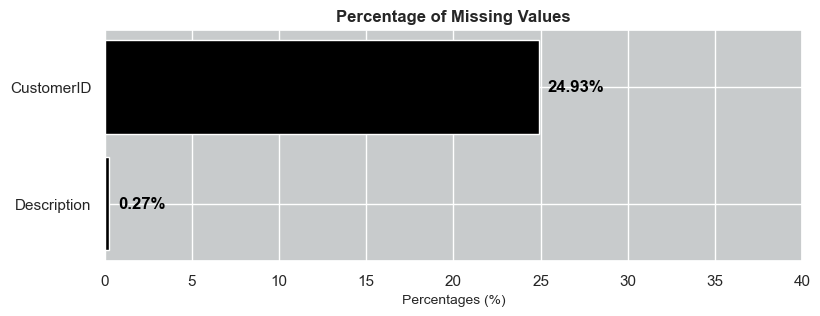

In [9]:
# Calculating the percentage of missing values for each column
missing_data = df.isnull().sum()
missing_percentage = (missing_data[missing_data > 0] / df.shape[0]) * 100

# Prepare values
missing_percentage.sort_values(ascending=True, inplace=True)

# Plot the barh chart
fig, ax = plt.subplots(figsize=(9, 3))
ax.barh(missing_percentage.index, missing_percentage, color='black')

# Annotate the values and indexes
for i, (value, name) in enumerate(zip(missing_percentage, missing_percentage.index)):
    ax.text(value+0.5, i, f"{value:.2f}%", ha='left', va='center', fontweight='bold', fontsize=12, color='black')

# Set x-axis limit
ax.set_xlim([0, 40])

# Add title and xlabel
plt.title("Percentage of Missing Values", fontweight='bold', fontsize=12)
plt.xlabel('Percentages (%)', fontsize=10)
plt.show()


- __`CustomerID` (24.93% data not available)__
   - About a quarter of the data in the `CustomerID` column is missing. This column is crucial for tasks like customer clustering and building a recommendation system. Attempting to fill in or impute such a large portion of missing data could introduce significant bias or noise into our analysis.
    
   - Additionally, since customer clustering relies on accurate customer identification, it is best to remove the rows with missing `CustomerID` to ensure the reliability of our clusters and analysis.

    
- __`Description` (0.27% data not available)__
   - There is a small percentage of missing data in the `Description` column (0.27%). However, there are inconsistencies in the dataset where the same `StockCode` does not always correspond to the same `Description`. This suggests data quality issues and potential errors in the product descriptions.
    
   - Based on these inconsistencies, it might not be dependable to fill in the missing descriptions based on `StockCode`. Furthermore, since the missing data percentage is relatively low, it is a prudent decision to remove the rows with missing `Description` to prevent the spread of errors and inconsistencies in subsequent analyses.
   
By removing rows with missing values in the `CustomerID` and `Description` columns, we aim to construct a cleaner and more reliable dataset, which is essential for achieving accurate clustering and creating an effective recommendation system.


In [10]:
# Extracting rows with missing values in 'CustomerID' or 'Description' columns
df[df['CustomerID'].isnull() | df['Description'].isnull()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


In [11]:
# Removing rows with missing values in 'CustomerID' and 'Description' columns
df = df.dropna(subset=['CustomerID', 'Description'])

In [12]:
# Verifying the removal of missing values
df.isnull().sum().sum()

0

In [13]:
# Finding duplicate rows (keeping all instances)
duplicate_rows = df[df.duplicated(keep=False)]

# Sorting the data by certain columns to see the duplicate rows next to each other
duplicate_rows_sorted = duplicate_rows.sort_values(by=['InvoiceNo', 'StockCode', 'Description', 'CustomerID', 'Quantity'])

# Displaying the first 5 records
duplicate_rows_sorted.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom


In [14]:
# Displaying the number of duplicate rows
print(f"The dataset contains {df.duplicated().sum()} duplicate rows that need to be removed.")

# Removing duplicate rows
df.drop_duplicates(inplace=True)

The dataset contains 5225 duplicate rows that need to be removed.


In [15]:
# Getting the number of rows in the dataframe
df.shape[0]

401604

In [16]:
# New column indicating the transaction status, C indicates Cancelled in Transaction Status
df['Transaction_Status'] = np.where(df['InvoiceNo'].astype(str).str.startswith('C'), 'Cancelled', 'Completed')

# Analyze the characteristics of these rows (considering the new column)
cancelled_transactions = df[df['Transaction_Status'] == 'Cancelled']
cancelled_transactions.describe().drop('CustomerID', axis=1)

,Quantity,UnitPrice
count,8872.000000,8872.000000
mean,-30.774910,18.899512
std,1172.249902,445.190864
min,-80995.000000,0.010000
25%,-6.000000,1.450000
50%,-2.000000,2.950000
75%,-1.000000,4.950000
max,-1.000000,38970.000000


In [17]:
# Finding the number of unique stock codes
unique_stock_codes = df['StockCode'].nunique()

# Printing the number of unique stock codes
print(f"The number of unique stock codes in the dataset is: {unique_stock_codes}")

The number of unique stock codes in the dataset is: 3684


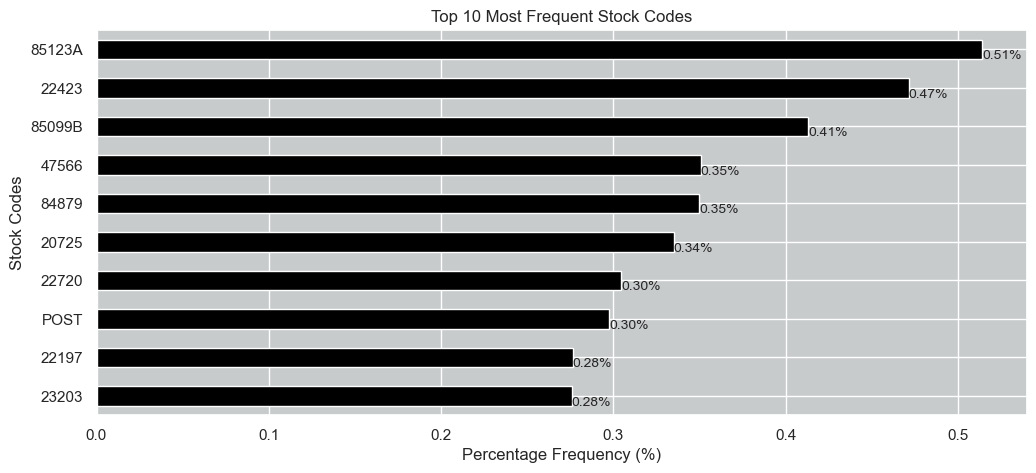

In [18]:
# Finding the top 10 most frequent stock codes
top_10_stock_codes = df['StockCode'].value_counts(normalize=True).head(10) * 100

# Plotting the top 10 most frequent stock codes
plt.figure(figsize=(12, 5))
top_10_stock_codes.plot(kind='barh', color='black')

# Adding the percentage frequency on the bars
for index, value in enumerate(top_10_stock_codes):
    plt.text(value, index+0.25, f'{value:.2f}%', fontsize=10)

plt.title('Top 10 Most Frequent Stock Codes')
plt.xlabel('Percentage Frequency (%)')
plt.ylabel('Stock Codes')
plt.gca().invert_yaxis()
plt.show()


- **`Product Variety`**: The dataset contains a substantial diversity of products, with 3684 unique stock codes. This indicates that there is a wide range of different products available in the e-commerce platform. This diversity could potentially help in identifying distinct customer groups that have preferences for various types of products.


- **`Popular Items`**: Examining the top 10 most frequently occurring stock codes can provide valuable insights into which products or product categories are highly popular and frequently purchased by customers.


- **`Stock Code Anomalies`**: It's worth noting that while most stock codes consist of 5 or 6 characters, there are some exceptions like the code '__POST__'. These anomalies may not represent actual products but could instead indicate services or non-product transactions, such as postage fees. To maintain the project's focus, which is centered around clustering based on product purchases and creating a recommendation system, it's important to investigate these anomalies further and potentially handle them appropriately to ensure the integrity of the data.

In [19]:
# Finding the number of numeric characters in each unique stock code
unique_stock_codes = df['StockCode'].unique()
numeric_char_counts_in_unique_codes = pd.Series(unique_stock_codes).apply(lambda x: sum(c.isdigit() for c in str(x))).value_counts()

# Printing the value counts for unique stock codes
print("Value counts of numeric character frequencies in unique stock codes:")
print("-"*70)
print(numeric_char_counts_in_unique_codes)

Value counts of numeric character frequencies in unique stock codes:
----------------------------------------------------------------------
5    3676
0       7
1       1
dtype: int64


In [20]:
# Finding and printing the stock codes with 0 and 1 numeric characters
anomalous_stock_codes = [code for code in unique_stock_codes if sum(c.isdigit() for c in str(code)) in (0, 1)]

# Printing each stock code on a new line
print("Anomalous stock codes:")
print("-"*22)
for code in anomalous_stock_codes:
    print(code)

Anomalous stock codes:
----------------------
POST
D
C2
M
BANK CHARGES
PADS
DOT
CRUK


In [21]:
# Calculating the percentage of records with these stock codes
percentage_anomalous = (df['StockCode'].isin(anomalous_stock_codes).sum() / len(df)) * 100

# Printing the percentage
print(f"The percentage of records with anomalous stock codes in the dataset is: {percentage_anomalous:.2f}%")

The percentage of records with anomalous stock codes in the dataset is: 0.48%


Based on analysis, only a very small fraction of the records, specifically 0.48%, exhibit unusual stock codes that differ from the typical format observed in the majority of the data. Additionally, these unusual codes constitute a very small subset among the total unique stock codes, amounting to just 8 out of 3684.

These atypical codes appear to represent non-product transactions such as "__BANK CHARGES__" and "__POST__," which could likely indicate postage fees or similar non-product-related activities. Given their insignificance both in terms of the dataset size and their representation among unique stock codes, their inclusion in our analysis might introduce unwanted noise and potentially distort the results of the clustering and recommendation system.

Considering the project's context, where objective is to cluster customers based on their product purchasing patterns and create a product recommendation system, it would be wise to exclude the records with these unusual stock codes from the dataset. This approach ensures that focus remains exclusively on genuine product transactions, leading to a more accurate and meaningful analysis. Therefore, strategy involves filtering and removing rows containing these anomalous stock codes from the dataset before proceeding with further analysis and model development.

In [22]:
# Removing rows with anomalous stock codes from the dataset
df = df[~df['StockCode'].isin(anomalous_stock_codes)]

In [23]:
# Getting the number of rows in the dataframe
df.shape[0]

399689

 
Calculate the occurrence count of each unique description in the dataset. Then, plot the top 30 descriptions. This visualization will give a clear view of the highest occurring descriptions in the dataset.

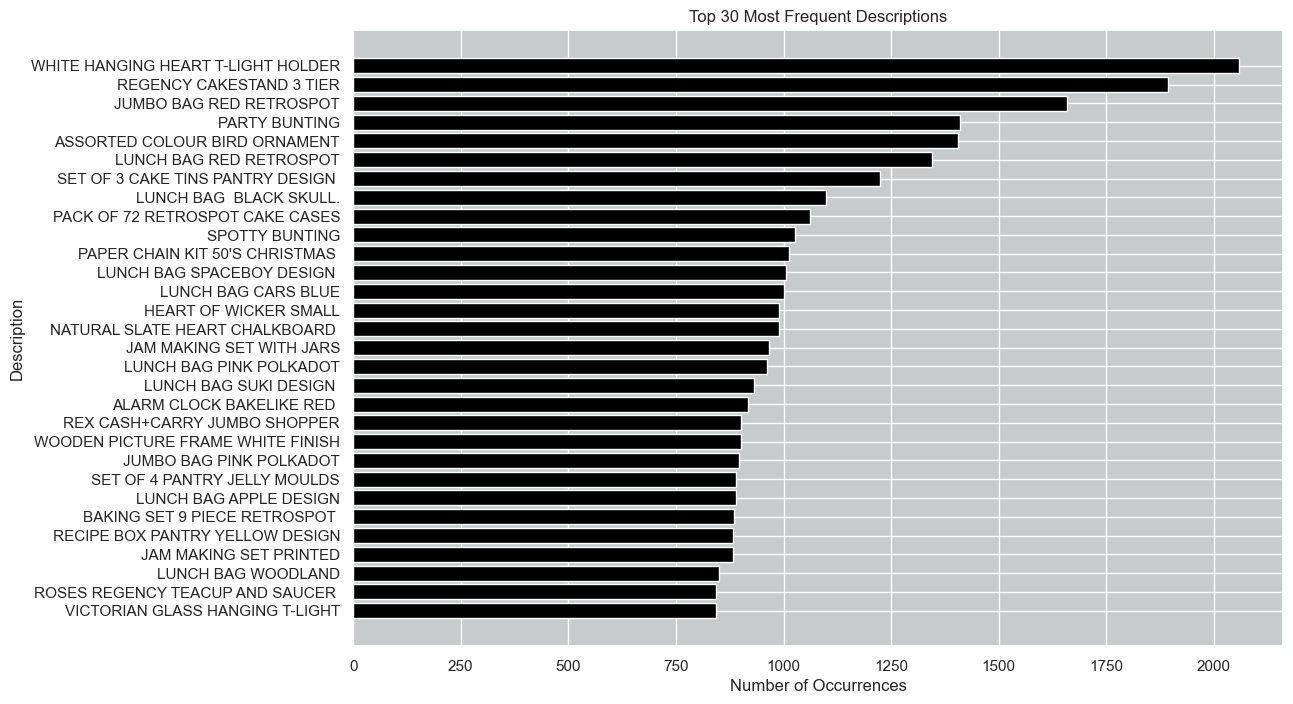

In [24]:
# Calculate the occurrence of each unique description and sort them
description_counts = df['Description'].value_counts()

# Get the top 30 descriptions
top_30_descriptions = description_counts[:30]

# Plotting
plt.figure(figsize=(12,8))
plt.barh(top_30_descriptions.index[::-1], top_30_descriptions.values[::-1], color='black')

# Adding labels and title
plt.xlabel('Number of Occurrences')
plt.ylabel('Description')
plt.title('Top 30 Most Frequent Descriptions')

# Show the plot
plt.show()


    - The most common product descriptions mainly pertain to household items, with a particular focus on kitchenware, lunch bags, and decorative items.


    - Notably, all the descriptions are written in uppercase letters, which could indicate a standardized format for entering product descriptions into the database. However, given the irregularities and anomalies we've come across in the dataset thus far, it would be advisable to verify whether there are any descriptions that have been entered in lowercase or a combination of different letter case styles.

In [25]:
# Find unique descriptions containing lowercase characters
lowercase_descriptions = df['Description'].unique()
lowercase_descriptions = [desc for desc in lowercase_descriptions if any(char.islower() for char in desc)]

# Print the unique descriptions containing lowercase characters
print("The unique descriptions containing lowercase characters are:")
print("-"*60)
for desc in lowercase_descriptions:
    print(desc)

The unique descriptions containing lowercase characters are:
------------------------------------------------------------
BAG 500g SWIRLY MARBLES
POLYESTER FILLER PAD 45x45cm
POLYESTER FILLER PAD 45x30cm
POLYESTER FILLER PAD 40x40cm
FRENCH BLUE METAL DOOR SIGN No
BAG 250g SWIRLY MARBLES
BAG 125g SWIRLY MARBLES
3 TRADITIONAl BISCUIT CUTTERS  SET
NUMBER TILE COTTAGE GARDEN No
FOLK ART GREETING CARD,pack/12
ESSENTIAL BALM 3.5g TIN IN ENVELOPE
POLYESTER FILLER PAD 65CMx65CM
NUMBER TILE VINTAGE FONT No 
POLYESTER FILLER PAD 30CMx30CM
POLYESTER FILLER PAD 60x40cm
FLOWERS HANDBAG blue and orange
Next Day Carriage
THE KING GIFT BAG 25x24x12cm
High Resolution Image


    After examining the descriptions containing lowercase characters, it becomes apparent that certain entries are not descriptions of products. Examples of such entries include "Next Day Carriage" and "High Resolution Image" which seem unrelated to actual products and likely represent different types of information or service details.

    To ensure the integrity of our analysis and the development of the clustering and recommendation system, it is advisable to eliminate rows containing descriptions related to services, such as "Next Day Carriage" and "High Resolution Image," as they do not represent real products.
    
    For the descriptions that remain and have a mix of uppercase and lowercase characters, we should standardize the text to uppercase. This standardization will help maintain consistency throughout the dataset and reduce the possibility of duplicate entries with different letter case styles.

In [26]:
service_related_descriptions = ["Next Day Carriage", "High Resolution Image"]

# Calculate the percentage of records with service-related descriptions
service_related_percentage = df[df['Description'].isin(service_related_descriptions)].shape[0] / df.shape[0] * 100

# Print the percentage of records with service-related descriptions
print(f"The percentage of records with service-related descriptions in the dataset is: {service_related_percentage:.2f}%")

# Remove rows with service-related information in the description
df = df[~df['Description'].isin(service_related_descriptions)]

# Standardize the text to uppercase to maintain uniformity across the dataset
df['Description'] = df['Description'].str.upper()

The percentage of records with service-related descriptions in the dataset is: 0.02%


In [27]:
# Getting the number of rows in the dataframe
df.shape[0]

399606

In [28]:
# Statistical description of the UnitPrice column
df['UnitPrice'].describe()

count    399606.000000
mean          2.904957
std           4.448796
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max         649.500000
Name: UnitPrice, dtype: float64

    The presence of a minimum unit price value of zero in the dataset raises questions about certain transactions where the unit price is either free or possibly the result of a data entry error. To gain a better understanding of these transactions, it is crucial to conduct a thorough examination of the product descriptions associated with zero unit prices. This analysis aims to identify any patterns or common characteristics among these transactions.

In [29]:
df[df['UnitPrice']==0].describe()[['Quantity']]

,Quantity
count,33.000000
mean,420.515152
std,2176.713608
min,1.000000
25%,2.000000
50%,11.000000
75%,36.000000
max,12540.000000


    - The transactions with a unit price of zero are relatively few in number (33 transactions).
       
    - These transactions have a large variability in the quantity of items involved, ranging from 1 to 12540, with a substantial standard deviation.
    
    - Including these transactions in the clustering analysis might introduce noise and could potentially distort the customer behavior patterns identified by the clustering algorithm.

    Given the small number of these transactions and their potential to introduce noise in the data analysis, the strategy should be to remove these transactions from the dataset. This would help in maintaining a cleaner and more consistent dataset, which is essential for building an accurate and reliable clustering model and recommendation system.

In [30]:
# Removing records with a unit price of zero to avoid potential data entry errors
df = df[df['UnitPrice'] > 0]

    In the context of K-means clustering, it's important to acknowledge that the algorithm can be sensitive to both data scaling and the presence of outliers. These factors have the potential to significantly impact the positioning of centroids and, consequently, the accuracy of cluster assignments. However, given the specific goals of this project, which involve gaining insights into customer behavior and preferences through K-means clustering, it's advisable to defer addressing the issue of outliers until after the feature engineering phase. During this phase, lets create a customer-centric dataset.

    At this initial stage, our data is transactional in nature, and removing outliers prematurely may result in the loss of valuable information that could be instrumental in segmenting customers effectively later on. Therefore, we've chosen to postpone the treatment of outliers for now and proceed to the next stage of analysis.

In [31]:
# Resetting the index of the cleaned dataset
df.reset_index(drop=True, inplace=True)

In [32]:
# Getting the number of rows in the dataframe
df.shape[0]

399573

<a id="feature_engineering"></a>
# Feature Engineering

In [33]:
# Import Libraries

from scipy.stats import linregress
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
from tabulate import tabulate
from collections import Counter


### RFM Features


    RFM, which stands for Recency, Frequency, and Monetary, is a technique used to evaluate customer value and segment customers. It encompasses the following components:

    - Recency (R): This metric measures the time elapsed since a customer's last purchase. A shorter duration indicates more recent engagement and activity.

    - Frequency (F): Frequency quantifies how often a customer makes purchases within a specific timeframe. Higher purchase frequency implies greater loyalty and engagement.

    - Monetary (M): The Monetary metric assesses the total amount a customer has spent over a given period. A higher monetary value signifies a larger contribution and potentially greater long-term value.

    By utilizing these RFM metrics, businesses can gain valuable insights into customer behaviors and effectively tailor their marketing strategies. This, in turn, aids in the development of recommendation engines and other customer-centric initiatives.

In [34]:
# Convert InvoiceDate to datetime type
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Convert InvoiceDate to datetime and extract only the date
df['InvoiceDay'] = df['InvoiceDate'].dt.date

# Find the most recent purchase date for each customer
customer_data = df.groupby('CustomerID')['InvoiceDay'].max().reset_index()

# Find the most recent date in the entire dataset
most_recent_date = df['InvoiceDay'].max()

# Convert InvoiceDay to datetime type before subtraction
customer_data['InvoiceDay'] = pd.to_datetime(customer_data['InvoiceDay'])
most_recent_date = pd.to_datetime(most_recent_date)

# Calculate the number of days since the last purchase for each customer
customer_data['Days_Since_Last_Purchase'] = (most_recent_date - customer_data['InvoiceDay']).dt.days

# Remove the InvoiceDay column
customer_data.drop(columns=['InvoiceDay'], inplace=True)

In [35]:
customer_data.head()

,CustomerID,Days_Since_Last_Purchase
0,12346.0,325
1,12347.0,2
2,12348.0,75
3,12349.0,18
4,12350.0,310


Two features that quantify the frequency of a customer's engagement with the retailer:

- __`Total Transactions`__: This feature represents the total number of transactions made by a customer. It helps in understanding the engagement level of a customer with the retailer.
  
  
- __`Total Products Purchased`__: This feature indicates the total number of products (sum of quantities) purchased by a customer across all transactions. It gives an insight into the customer's buying behavior in terms of the volume of products purchased.


In [36]:
# Calculate the total number of transactions made by each customer
total_transactions = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
total_transactions.rename(columns={'InvoiceNo': 'Total_Transactions'}, inplace=True)

# Calculate the total number of products purchased by each customer
total_products_purchased = df.groupby('CustomerID')['Quantity'].sum().reset_index()
total_products_purchased.rename(columns={'Quantity': 'Total_Products_Purchased'}, inplace=True)

# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, total_transactions, on='CustomerID')
customer_data = pd.merge(customer_data, total_products_purchased, on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased
0,12346.0,325,2,0
1,12347.0,2,7,2458
2,12348.0,75,4,2332
3,12349.0,18,1,630
4,12350.0,310,1,196


Two features that represent the monetary aspect of customer's transactions:

- __`Total Spend`__: This feature represents the total amount of money spent by each customer. It is calculated as the sum of the product of `UnitPrice` and `Quantity` for all transactions made by a customer. This feature is crucial as it helps in identifying the total revenue generated by each customer, which is a direct indicator of a customer's value to the business.

    
- __`Average Transaction Value`__: This feature is calculated as the __`Total Spend`__ divided by the __`Total Transactions`__ for each customer. It indicates the average value of a transaction carried out by a customer. This metric is useful in understanding the spending behavior of customers per transaction, which can assist in tailoring marketing strategies and offers to different customer segments based on their average spending patterns.

In [37]:
# Calculate the total spend by each customer
df['Total_Spend'] = df['UnitPrice'] * df['Quantity']
total_spend = df.groupby('CustomerID')['Total_Spend'].sum().reset_index()

# Calculate the average transaction value for each customer
average_transaction_value = total_spend.merge(total_transactions, on='CustomerID')
average_transaction_value['Average_Transaction_Value'] = average_transaction_value['Total_Spend'] / average_transaction_value['Total_Transactions']

# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, total_spend, on='CustomerID')
customer_data = pd.merge(customer_data, average_transaction_value[['CustomerID', 'Average_Transaction_Value']], on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value
0,12346.0,325,2,0,0.00,0.000000
1,12347.0,2,7,2458,4310.00,615.714286
2,12348.0,75,4,2332,1437.24,359.310000
3,12349.0,18,1,630,1457.55,1457.550000
4,12350.0,310,1,196,294.40,294.400000


Let's understand the diversity in the product purchase behavior of customers. Understanding product diversity can help in crafting personalized marketing strategies and product recommendations. Here, I am going to define the following feature:

- __`Unique Products Purchased`__: This feature represents the number of distinct products bought by a customer. A higher value indicates that the customer has a diverse taste or preference, buying a wide range of products, while a lower value might indicate a focused or specific preference. Understanding the diversity in product purchases can help in segmenting customers based on their buying diversity, which can be a critical input in personalizing product recommendations.

In [38]:
# Calculate the number of unique products purchased by each customer
unique_products_purchased = df.groupby('CustomerID')['StockCode'].nunique().reset_index()
unique_products_purchased.rename(columns={'StockCode': 'Unique_Products_Purchased'}, inplace=True)

# Merge the new feature into the customer_data dataframe
customer_data = pd.merge(customer_data, unique_products_purchased, on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased
0,12346.0,325,2,0,0.00,0.000000,1
1,12347.0,2,7,2458,4310.00,615.714286,103
2,12348.0,75,4,2332,1437.24,359.310000,21
3,12349.0,18,1,630,1457.55,1457.550000,72
4,12350.0,310,1,196,294.40,294.400000,16


We aim to understand and capture the shopping patterns and behaviors of customers. These features will give us insights into the customers' preferences regarding when they like to shop, which can be crucial information for personalizing their shopping experience. Here are the features I am planning to introduce:

- __`Average Days Between Purchases`__: This feature represents the average number of days a customer waits before making another purchase. Understanding this can help in predicting when the customer is likely to make their next purchase, which can be a crucial metric for targeted marketing and personalized promotions.

    
- __`Favorite Shopping Day`__: This denotes the day of the week when the customer shops the most. This information can help in identifying the preferred shopping days of different customer segments, which can be used to optimize marketing strategies and promotions for different days of the week.

    
- __`Favorite Shopping Hour`__: This refers to the hour of the day when the customer shops the most. Identifying the favorite shopping hour can aid in optimizing the timing of marketing campaigns and promotions to align with the times when different customer segments are most active.


In [39]:
# Extract day of week and hour from InvoiceDate
df['Day_Of_Week'] = df['InvoiceDate'].dt.dayofweek
df['Hour'] = df['InvoiceDate'].dt.hour

# Calculate the average number of days between consecutive purchases
days_between_purchases = df.groupby('CustomerID')['InvoiceDay'].apply(lambda x: (x.diff().dropna()).apply(lambda y: y.days))
average_days_between_purchases = days_between_purchases.groupby('CustomerID').mean().reset_index()
average_days_between_purchases.rename(columns={'InvoiceDay': 'Average_Days_Between_Purchases'}, inplace=True)

# Find the favorite shopping day of the week
favorite_shopping_day = df.groupby(['CustomerID', 'Day_Of_Week']).size().reset_index(name='Count')
favorite_shopping_day = favorite_shopping_day.loc[favorite_shopping_day.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Day_Of_Week']]

# Find the favorite shopping hour of the day
favorite_shopping_hour = df.groupby(['CustomerID', 'Hour']).size().reset_index(name='Count')
favorite_shopping_hour = favorite_shopping_hour.loc[favorite_shopping_hour.groupby('CustomerID')['Count'].idxmax()][['CustomerID', 'Hour']]

# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, average_days_between_purchases, on='CustomerID')
customer_data = pd.merge(customer_data, favorite_shopping_day, on='CustomerID')
customer_data = pd.merge(customer_data, favorite_shopping_hour, on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.head(10)

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour
0,12346.0,325,2,0,0.00,0.000000,1,0.000000,1,10
1,12347.0,2,7,2458,4310.00,615.714286,103,2.016575,1,14
2,12348.0,75,4,2332,1437.24,359.310000,21,10.884615,3,19
3,12349.0,18,1,630,1457.55,1457.550000,72,0.000000,0,9
4,12350.0,310,1,196,294.40,294.400000,16,0.000000,2,16
5,12352.0,36,8,463,1265.41,158.176250,57,3.132530,1,14
6,12353.0,204,1,20,89.00,89.000000,4,0.000000,3,17
7,12354.0,232,1,530,1079.40,1079.400000,58,0.000000,3,13
8,12355.0,214,1,240,459.40,459.400000,13,0.000000,0,13
9,12356.0,22,3,1573,2487.43,829.143333,52,5.315789,1,9


A geographic feature that reflects the geographical location of customers. Understanding the geographic distribution of customers is pivotal for several reasons:

- __`Country`__: This feature identifies the country where each customer is located. Including the country data can help us understand region-specific buying patterns and preferences. Different regions might have varying preferences and purchasing behaviors which can be critical in personalizing marketing strategies and inventory planning. Furthermore, it can be instrumental in logistics and supply chain optimization, particularly for an online retailer where shipping and delivery play a significant role.

In [40]:
df['Country'].value_counts(normalize=True).head()

United Kingdom    0.890971
Germany           0.022722
France            0.020402
EIRE              0.018440
Spain             0.006162
Name: Country, dtype: float64

Given that a substantial portion (__89%__) of transactions are originating from the __United Kingdom__, we might consider creating a binary feature indicating whether the transaction is from the UK or not. This approach can potentially streamline the clustering process without losing critical geographical information, especially when considering the application of algorithms like K-means which are sensitive to the dimensionality of the feature space.

First, group the data by `CustomerID` and `Country` and calculate the number of transactions per country for each customer. Next, identify the main country for each customer (the country from which they have the maximum transactions). Create a binary column indicating whether the customer is from the UK or not. Merge this information with the `customer_data` dataframe to include the new feature in our analysis.

In [41]:
# Group by CustomerID and Country to get the number of transactions per country for each customer
customer_country = df.groupby(['CustomerID', 'Country']).size().reset_index(name='Number_of_Transactions')

# Get the country with the maximum number of transactions for each customer (in case a customer has transactions from multiple countries)
customer_main_country = customer_country.sort_values('Number_of_Transactions', ascending=False).drop_duplicates('CustomerID')

# Create a binary column indicating whether the customer is from the UK or not
customer_main_country['Is_UK'] = customer_main_country['Country'].apply(lambda x: 1 if x == 'United Kingdom' else 0)

# Merge this data with our customer_data dataframe
customer_data = pd.merge(customer_data, customer_main_country[['CustomerID', 'Is_UK']], on='CustomerID', how='left')

# Display the first few rows of the customer_data dataframe
customer_data.head(10)

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK
0,12346.0,325,2,0,0.00,0.000000,1,0.000000,1,10,1
1,12347.0,2,7,2458,4310.00,615.714286,103,2.016575,1,14,0
2,12348.0,75,4,2332,1437.24,359.310000,21,10.884615,3,19,0
3,12349.0,18,1,630,1457.55,1457.550000,72,0.000000,0,9,0
4,12350.0,310,1,196,294.40,294.400000,16,0.000000,2,16,0
5,12352.0,36,8,463,1265.41,158.176250,57,3.132530,1,14,0
6,12353.0,204,1,20,89.00,89.000000,4,0.000000,3,17,0
7,12354.0,232,1,530,1079.40,1079.400000,58,0.000000,3,13,0
8,12355.0,214,1,240,459.40,459.400000,13,0.000000,0,13,0
9,12356.0,22,3,1573,2487.43,829.143333,52,5.315789,1,9,0


In [42]:
# Display feature distribution
customer_data['Is_UK'].value_counts()

1    3866
0     416
Name: Is_UK, dtype: int64

Cancellation patterns of customers to gain insights that can enhance model. The features are:

- __`Cancellation Frequency`__: This metric represents the total number of transactions a customer has canceled. Understanding the frequency of cancellations can help us identify customers who are more likely to cancel transactions. This could be an indicator of dissatisfaction or other issues, and understanding this can help us tailor strategies to reduce cancellations and enhance customer satisfaction.

    
- __`Cancellation Rate`__: This represents the proportion of transactions that a customer has canceled out of all their transactions. This metric gives a normalized view of cancellation behavior. A high cancellation rate might be indicative of an unsatisfied customer segment. By identifying these segments, we can develop targeted strategies to improve their shopping experience and potentially reduce the cancellation rate.


In [43]:
# Calculate the total number of transactions made by each customer
total_transactions = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()

# Calculate the number of cancelled transactions for each customer
cancelled_transactions = df[df['Transaction_Status'] == 'Cancelled']
cancellation_frequency = cancelled_transactions.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
cancellation_frequency.rename(columns={'InvoiceNo': 'Cancellation_Frequency'}, inplace=True)

# Merge the Cancellation Frequency data into the customer_data dataframe
customer_data = pd.merge(customer_data, cancellation_frequency, on='CustomerID', how='left')

# Replace NaN values with 0 (for customers who have not cancelled any transaction)
customer_data['Cancellation_Frequency'].fillna(0, inplace=True)

# Calculate the Cancellation Rate
customer_data['Cancellation_Rate'] = customer_data['Cancellation_Frequency'] / total_transactions['InvoiceNo']

# Display the first few rows of the customer_data dataframe
customer_data.head(10)

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate
0,12346.0,325,2,0,0.00,0.000000,1,0.000000,1,10,1,1.0,0.500
1,12347.0,2,7,2458,4310.00,615.714286,103,2.016575,1,14,0,0.0,0.000
2,12348.0,75,4,2332,1437.24,359.310000,21,10.884615,3,19,0,0.0,0.000
3,12349.0,18,1,630,1457.55,1457.550000,72,0.000000,0,9,0,0.0,0.000
4,12350.0,310,1,196,294.40,294.400000,16,0.000000,2,16,0,0.0,0.000
5,12352.0,36,8,463,1265.41,158.176250,57,3.132530,1,14,0,1.0,0.125
6,12353.0,204,1,20,89.00,89.000000,4,0.000000,3,17,0,0.0,0.000
7,12354.0,232,1,530,1079.40,1079.400000,58,0.000000,3,13,0,0.0,0.000
8,12355.0,214,1,240,459.40,459.400000,13,0.000000,0,13,0,0.0,0.000
9,12356.0,22,3,1573,2487.43,829.143333,52,5.315789,1,9,0,0.0,0.000


Seasonality and trends in customers' purchasing behaviors, which can offer invaluable insights for tailoring marketing strategies and enhancing customer satisfaction. Here are the features I am looking to introduce:

- __`Monthly_Spending_Mean`__: This is the average amount a customer spends monthly. It helps us gauge the general spending habit of each customer. A higher mean indicates a customer who spends more, potentially showing interest in premium products, whereas a lower mean might indicate a more budget-conscious customer.

    
- __`Monthly_Spending_Std`__: This feature indicates the variability in a customer's monthly spending. A higher value signals that the customer's spending fluctuates significantly month-to-month, perhaps indicating sporadic large purchases. In contrast, a lower value suggests more stable, consistent spending habits. Understanding this variability can help in crafting personalized promotions or discounts during periods they are expected to spend more.

    
- __`Spending_Trend`__: This reflects the trend in a customer's spending over time, calculated as the slope of the linear trend line fitted to their spending data. A positive value indicates an increasing trend in spending, possibly pointing to growing loyalty or satisfaction. Conversely, a negative trend might signal decreasing interest or satisfaction, highlighting a need for re-engagement strategies. A near-zero value signifies stable spending habits. Recognizing these trends can help in developing strategies to either maintain or alter customer spending patterns, enhancing the effectiveness of marketing campaigns.

In [44]:
# Extract month and year from InvoiceDate
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month

# Calculate monthly spending for each customer
monthly_spending = df.groupby(['CustomerID', 'Year', 'Month'])['Total_Spend'].sum().reset_index()

# Calculate Seasonal Buying Patterns: We are using monthly frequency as a proxy for seasonal buying patterns
seasonal_buying_patterns = monthly_spending.groupby('CustomerID')['Total_Spend'].agg(['mean', 'std']).reset_index()
seasonal_buying_patterns.rename(columns={'mean': 'Monthly_Spending_Mean', 'std': 'Monthly_Spending_Std'}, inplace=True)

# Replace NaN values in Monthly_Spending_Std with 0, implying no variability for customers with single transaction month
seasonal_buying_patterns['Monthly_Spending_Std'].fillna(0, inplace=True)

# Calculate Trends in Spending 
# We are using the slope of the linear trend line fitted to the customer's spending over time as an indicator of spending trends
def calculate_trend(spend_data):
    # If there are more than one data points, we calculate the trend using linear regression
    if len(spend_data) > 1:
        x = np.arange(len(spend_data))
        slope, _, _, _, _ = linregress(x, spend_data)
        return slope
    # If there is only one data point, no trend can be calculated, hence we return 0
    else:
        return 0

# Apply the calculate_trend function to find the spending trend for each customer
spending_trends = monthly_spending.groupby('CustomerID')['Total_Spend'].apply(calculate_trend).reset_index()
spending_trends.rename(columns={'Total_Spend': 'Spending_Trend'}, inplace=True)

# Merge the new features into the customer_data dataframe
customer_data = pd.merge(customer_data, seasonal_buying_patterns, on='CustomerID')
customer_data = pd.merge(customer_data, spending_trends, on='CustomerID')

# Display the first few rows of the customer_data dataframe
customer_data.head(10)

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,12346.0,325,2,0,0.00,0.000000,1,0.000000,1,10,1,1.0,0.500,0.000000,0.000000,0.000000
1,12347.0,2,7,2458,4310.00,615.714286,103,2.016575,1,14,0,0.0,0.000,615.714286,341.070789,4.486071
2,12348.0,75,4,2332,1437.24,359.310000,21,10.884615,3,19,0,0.0,0.000,359.310000,203.875689,-100.884000
3,12349.0,18,1,630,1457.55,1457.550000,72,0.000000,0,9,0,0.0,0.000,1457.550000,0.000000,0.000000
4,12350.0,310,1,196,294.40,294.400000,16,0.000000,2,16,0,0.0,0.000,294.400000,0.000000,0.000000
5,12352.0,36,8,463,1265.41,158.176250,57,3.132530,1,14,0,1.0,0.125,316.352500,134.700629,9.351000
6,12353.0,204,1,20,89.00,89.000000,4,0.000000,3,17,0,0.0,0.000,89.000000,0.000000,0.000000
7,12354.0,232,1,530,1079.40,1079.400000,58,0.000000,3,13,0,0.0,0.000,1079.400000,0.000000,0.000000
8,12355.0,214,1,240,459.40,459.400000,13,0.000000,0,13,0,0.0,0.000,459.400000,0.000000,0.000000
9,12356.0,22,3,1573,2487.43,829.143333,52,5.315789,1,9,0,0.0,0.000,829.143333,991.462585,-944.635000


In [45]:
# Changing the data type of 'CustomerID' to string as it is a unique identifier and not used in mathematical operations
customer_data['CustomerID'] = customer_data['CustomerID'].astype(str)

# Convert data types of columns to optimal types
customer_data = customer_data.convert_dtypes()

In [46]:
customer_data.head(10)

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,12346.0,325,2,0,0.0,0.0,1,0.0,1,10,1,1,0.5,0.0,0.0,0.0
1,12347.0,2,7,2458,4310.0,615.714286,103,2.016575,1,14,0,0,0.0,615.714286,341.070789,4.486071
2,12348.0,75,4,2332,1437.24,359.31,21,10.884615,3,19,0,0,0.0,359.31,203.875689,-100.884
3,12349.0,18,1,630,1457.55,1457.55,72,0.0,0,9,0,0,0.0,1457.55,0.0,0.0
4,12350.0,310,1,196,294.4,294.4,16,0.0,2,16,0,0,0.0,294.4,0.0,0.0
5,12352.0,36,8,463,1265.41,158.17625,57,3.13253,1,14,0,1,0.125,316.3525,134.700629,9.351
6,12353.0,204,1,20,89.0,89.0,4,0.0,3,17,0,0,0.0,89.0,0.0,0.0
7,12354.0,232,1,530,1079.4,1079.4,58,0.0,3,13,0,0,0.0,1079.4,0.0,0.0
8,12355.0,214,1,240,459.4,459.4,13,0.0,0,13,0,0,0.0,459.4,0.0,0.0
9,12356.0,22,3,1573,2487.43,829.143333,52,5.315789,1,9,0,0,0.0,829.143333,991.462585,-944.635


In [47]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4282 entries, 0 to 4281
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CustomerID                      4282 non-null   string 
 1   Days_Since_Last_Purchase        4282 non-null   Int64  
 2   Total_Transactions              4282 non-null   Int64  
 3   Total_Products_Purchased        4282 non-null   Int64  
 4   Total_Spend                     4282 non-null   Float64
 5   Average_Transaction_Value       4282 non-null   Float64
 6   Unique_Products_Purchased       4282 non-null   Int64  
 7   Average_Days_Between_Purchases  4282 non-null   Float64
 8   Day_Of_Week                     4282 non-null   Int64  
 9   Hour                            4282 non-null   Int64  
 10  Is_UK                           4282 non-null   Int64  
 11  Cancellation_Frequency          4282 non-null   Int64  
 12  Cancellation_Rate               42

### Customer Dataset Description:

| __Variable__                       | __Description__ |
|     :---                           |       :---      |
| __CustomerID__                     | Identifier uniquely assigned to each customer, used to distinguish individual customers. |
| __Days_Since_Last_Purchase__       | The number of days that have passed since the customer's last purchase. |
| __Total_Transactions__             | The total number of transactions made by the customer. |
| __Total_Products_Purchased__       | The total quantity of products purchased by the customer across all transactions. |
| __Total_Spend__                    | The total amount of money the customer has spent across all transactions. |
| __Average_Transaction_Value__      | The average value of the customer's transactions, calculated as total spend divided by the number of transactions. |
| __Unique_Products_Purchased__      | The number of different products the customer has purchased. |
| __Average_Days_Between_Purchases__ | The average number of days between consecutive purchases made by the customer. |
| __Day_Of_Week__                    | The day of the week when the customer prefers to shop, represented numerically (0 for Monday, 6 for Sunday). |
| __Hour__                           | The hour of the day when the customer prefers to shop, represented in a 24-hour format. |
| __Is_UK__                          | A binary variable indicating whether the customer is based in the UK (1) or not (0). |
| __Cancellation_Frequency__         | The total number of transactions that the customer has cancelled. |
| __Cancellation_Rate__              | The proportion of transactions that the customer has cancelled, calculated as cancellation frequency divided by total transactions. |
| __Monthly_Spending_Mean__          | The average monthly spending of the customer. |
| __Monthly_Spending_Std__           | The standard deviation of the customer's monthly spending, indicating the variability in their spending pattern. |
| __Spending_Trend__                 | A numerical representation of the trend in the customer's spending over time. A positive value indicates an increasing trend, a negative value indicates a decreasing trend, and a value close to zero indicates a stable trend. |


<a id="outlier_detection"></a>
# Outlier Detection and Treatment

    Identify and handle outliers in dataset. Outliers are data points that are significantly different from the majority of other points in the dataset. These points can potentially skew the results of our analysis, especially in k-means clustering where they can significantly influence the position of the cluster centroids. Therefore, it is essential to identify and treat these outliers appropriately to achieve more accurate and meaningful clustering results.

    Given the multi-dimensional nature of the data, it would be prudent to use algorithms that can detect outliers in multi-dimensional spaces. I am going to use the Isolation Forest algorithm for this task. This algorithm works well for multi-dimensional data and is computationally efficient. It isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.


In [48]:
# Initializing the IsolationForest model with a contamination parameter of 0.05
model = IsolationForest(contamination=0.05, random_state=0)

# Fitting the model on our dataset (converting DataFrame to NumPy to avoid warning)
customer_data['Outlier_Scores'] = model.fit_predict(customer_data.iloc[:, 1:].to_numpy())

# Creating a new column to identify outliers (1 for inliers and -1 for outliers)
customer_data['Is_Outlier'] = [1 if x == -1 else 0 for x in customer_data['Outlier_Scores']]

# Display the first few rows of the customer_data dataframe
customer_data.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,Outlier_Scores,Is_Outlier
0,12346.0,325,2,0,0.0,0.0,1,0.0,1,10,1,1,0.5,0.0,0.0,0.0,1,0
1,12347.0,2,7,2458,4310.0,615.714286,103,2.016575,1,14,0,0,0.0,615.714286,341.070789,4.486071,1,0
2,12348.0,75,4,2332,1437.24,359.31,21,10.884615,3,19,0,0,0.0,359.31,203.875689,-100.884,1,0
3,12349.0,18,1,630,1457.55,1457.55,72,0.0,0,9,0,0,0.0,1457.55,0.0,0.0,1,0
4,12350.0,310,1,196,294.4,294.4,16,0.0,2,16,0,0,0.0,294.4,0.0,0.0,1,0


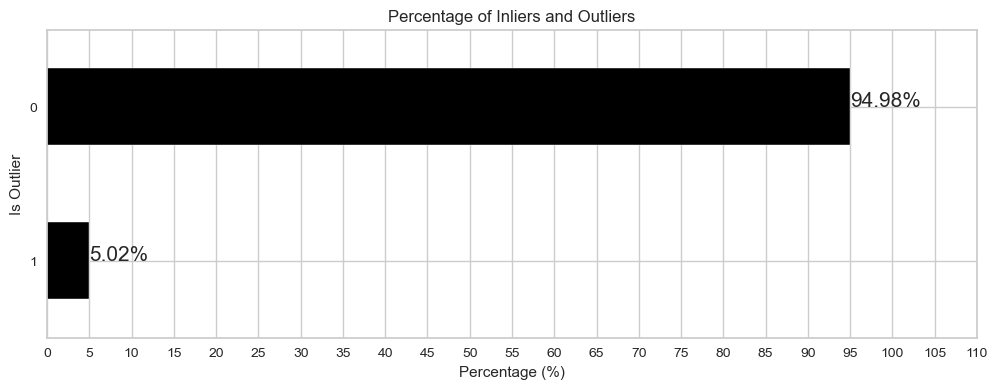

In [49]:
# Calculate the percentage of inliers and outliers
outlier_percentage = customer_data['Is_Outlier'].value_counts(normalize=True) * 100

# Plotting the percentage of inliers and outliers
plt.figure(figsize=(12, 4))
outlier_percentage.plot(kind='barh', color='black')

# Adding the percentage labels on the bars
for index, value in enumerate(outlier_percentage):
    plt.text(value, index, f'{value:.2f}%', fontsize=15)

plt.title('Percentage of Inliers and Outliers')
plt.xticks(ticks=np.arange(0, 115, 5))
plt.xlabel('Percentage (%)')
plt.ylabel('Is Outlier')
plt.gca().invert_yaxis()
plt.show()

From the above plot, we can observe that about 5% of the customers have been identified as outliers in our dataset. This percentage seems to be a reasonable proportion, not too high to lose a significant amount of data, and not too low to retain potentially noisy data points. It suggests that our isolation forest algorithm has worked well in identifying a moderate percentage of outliers, which will be critical in refining our customer segmentation.

Considering the nature of the project (customer segmentation using clustering), it is crucial to handle these outliers to prevent them from affecting the clusters' quality significantly. Therefore, I will separate these outliers for further analysis and remove them from our main dataset to prepare it for the clustering analysis. 

Let's proceed with the following steps:

- Separate the identified outliers for further analysis.

- Remove the outliers from the main dataset to prevent them from influencing the clustering process.

- Drop the `Outlier_Scores` and `Is_Outlier` columns as they were auxiliary columns used for the outlier detection process.


In [50]:
# Separate the outliers for analysis
outliers_data = customer_data[customer_data['Is_Outlier'] == 1]

# Remove the outliers from the main dataset
customer_data_cleaned = customer_data[customer_data['Is_Outlier'] == 0]

# Drop the 'Outlier_Scores' and 'Is_Outlier' columns
customer_data_cleaned = customer_data_cleaned.drop(columns=['Outlier_Scores', 'Is_Outlier'])

# Reset the index of the cleaned data
customer_data_cleaned.reset_index(drop=True, inplace=True)

In [51]:
# Getting the number of rows in the cleaned customer dataset
customer_data_cleaned.shape[0]

4067

<a id="correlation"></a>
# Correlation Analysis

    Before we proceed to KMeans clustering, it's essential to check the correlation between features in our dataset. The presence of multicollinearity, where features are highly correlated, can potentially affect the clustering process by not allowing the model to learn the actual underlying patterns in the data, as the features do not provide unique information. This could lead to clusters that are not well-separated and meaningful.

    If we identify multicollinearity, we can utilize dimensionality reduction techniques like PCA. These techniques help in neutralizing the effect of multicollinearity by transforming the correlated features into a new set of uncorrelated variables, preserving most of the original data's variance. This step not only enhances the quality of clusters formed but also makes the clustering process more computationally efficient.

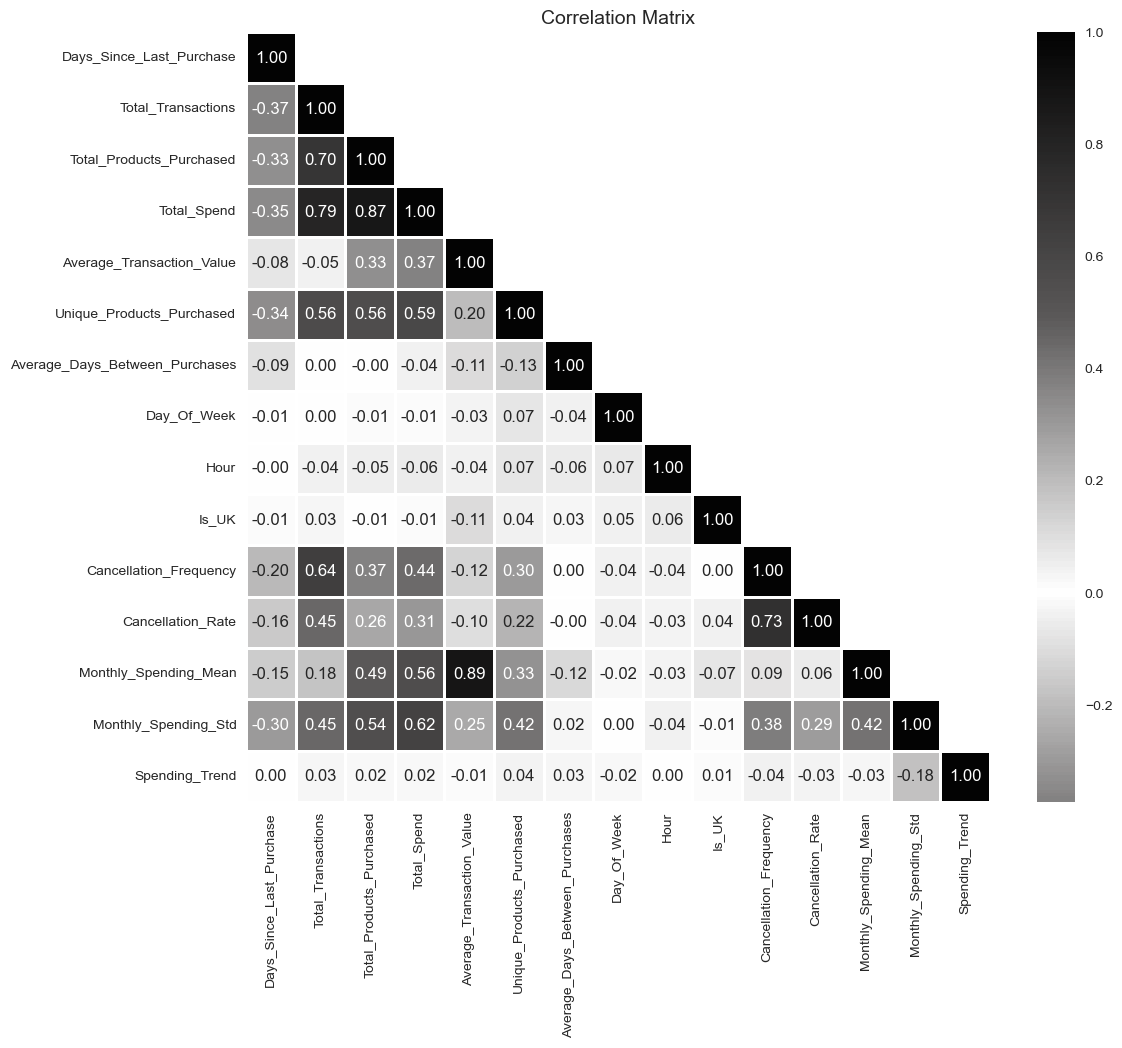

In [52]:
# Reset background style
sns.set_style('whitegrid')

# Calculate the correlation matrix excluding the 'CustomerID' column
corr = customer_data_cleaned.drop(columns=['CustomerID']).corr()

# Define a custom colormap
colors = ['#030303', '#595757', 'white', '#595757', '#030303']
my_cmap = LinearSegmentedColormap.from_list('custom_map', colors, N=256)

# Create a mask to only show the lower triangle of the matrix (since it's mirrored around its 
# top-left to bottom-right diagonal)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k=1)] = True

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, cmap=my_cmap, annot=True, center=0, fmt='.2f', linewidths=2)
plt.title('Correlation Matrix', fontsize=14)
plt.show()



    Looking at the heatmap, we can see that there are some pairs of variables that have high correlations, for instance:

- `Monthly_Spending_Mean` and `Average_Transaction_Value`
    
    
- `Total_Spend` and `Total_Products_Purchased`

    
- `Total_Transactions` and `Total_Spend`
    
    
- `Cancellation_Rate` and `Cancellation_Frequency`
    
    
- `Total_Transactions` and `Total_Products_Purchased`
 
    
    These high correlations indicate that these variables move closely together, implying a degree of multicollinearity.

    Treat this multicollinearity possibly through dimensionality reduction techniques such as PCA to create a set of uncorrelated variables. This will help in achieving more stable clusters during the KMeans clustering process.

<a id="scaling"></a>
# Feature Scaling

Before proceeding with clustering and dimensionality reduction, it is essential to standardize our features. This step is particularly crucial, especially in the context of algorithms like K-means clustering and dimensionality reduction techniques such as PCA. Here's why it's important:

- **For K-means Clustering**: K-means heavily relies on the concept of 'distance' between data points to create clusters. When features are not on a consistent scale, those with larger values can exert undue influence on the clustering process, potentially leading to inaccurate groupings.


- **For PCA**: PCA aims to identify the directions along which the data exhibits the most variation. When features are not scaled, those with larger values can disproportionately affect these principal components, potentially misrepresenting the true underlying patterns in the data.


Therefore, to ensure a balanced influence on the model and to reveal the true patterns in the data, I am going to standardize our data, meaning transforming the features to have a mean of 0 and a standard deviation of 1. However, not all features require scaling. Here are the exceptions and the reasons why they are excluded:

- __`CustomerID`__: This feature is just an identifier for the customers and does not contain any meaningful information for clustering.
    
    
- __`Is_UK`__: This is a binary feature indicating whether the customer is from the UK or not. Since it already takes a value of 0 or 1, scaling it won't make any significant difference.
    
    
- __`Day_Of_Week`__: This feature represents the most frequent day of the week that the customer made transactions. Since it's a categorical feature represented by integers (1 to 7), scaling it would not be necessary.



In [53]:
# Initialize the StandardScaler
scaler = StandardScaler()

# List of columns that don't need to be scaled
columns_to_exclude = ['CustomerID', 'Is_UK', 'Day_Of_Week']

# List of columns that need to be scaled
columns_to_scale = customer_data_cleaned.columns.difference(columns_to_exclude)

# Copy the cleaned dataset
customer_data_scaled = customer_data_cleaned.copy()

# Applying the scaler to the necessary columns in the dataset
customer_data_scaled[columns_to_scale] = scaler.fit_transform(customer_data_scaled[columns_to_scale])

# Display the first few rows of the scaled data
customer_data_scaled.head(10)

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend
0,12346.0,2.345802,-0.477589,-0.754491,-0.813464,-1.317106,-0.908471,-0.310564,1,-1.086929,1,0.420541,0.417623,-1.329018,-0.713318,0.090868
1,12347.0,-0.905575,0.707930,2.005048,2.366920,1.528132,0.815119,-0.128438,1,0.647126,0,-0.545753,-0.432111,0.989511,1.259961,0.116774
2,12348.0,-0.170744,-0.003381,1.863591,0.247087,0.343279,-0.570512,0.672476,3,2.814696,0,-0.545753,-0.432111,0.023997,0.466213,-0.491708
3,12349.0,-0.744516,-0.714692,-0.047205,0.262074,5.418285,0.291283,-0.310564,0,-1.520443,0,-0.545753,-0.432111,4.159521,-0.713318,0.090868
4,12350.0,2.194809,-0.714692,-0.534446,-0.596223,0.043327,-0.655002,-0.310564,2,1.514154,0,-0.545753,-0.432111,-0.220428,-0.713318,0.090868
5,12352.0,-0.563325,0.945033,-0.234692,0.120293,-0.586168,0.037814,-0.027651,1,0.647126,0,0.420541,-0.219678,-0.137764,0.065998,0.144867
6,12353.0,1.127794,-0.714692,-0.732037,-0.747790,-0.905833,-0.857777,-0.310564,3,1.947668,0,-0.545753,-0.432111,-0.993881,-0.713318,0.090868
7,12354.0,1.409647,-0.714692,-0.159472,-0.016966,3.670841,0.054712,-0.310564,3,0.213612,0,-0.545753,-0.432111,2.735562,-0.713318,0.090868
8,12355.0,1.228456,-0.714692,-0.485048,-0.474469,0.805798,-0.705696,-0.310564,0,0.213612,0,-0.545753,-0.432111,0.400895,-0.713318,0.090868
9,12358.0,-0.915641,-0.477589,-0.482803,-0.128641,0.827194,-0.722594,0.530491,1,-1.086929,0,-0.545753,-0.432111,0.418329,-0.229189,0.774247


<a id="pca"></a>
# Dimensionality Reduction

    Apply PCA on all the available components and plot the cumulative variance explained by them. This process will allow to visualize how much variance each additional principal component can explain, thereby helping to pinpoint the optimal number of components to retain for the analysis.

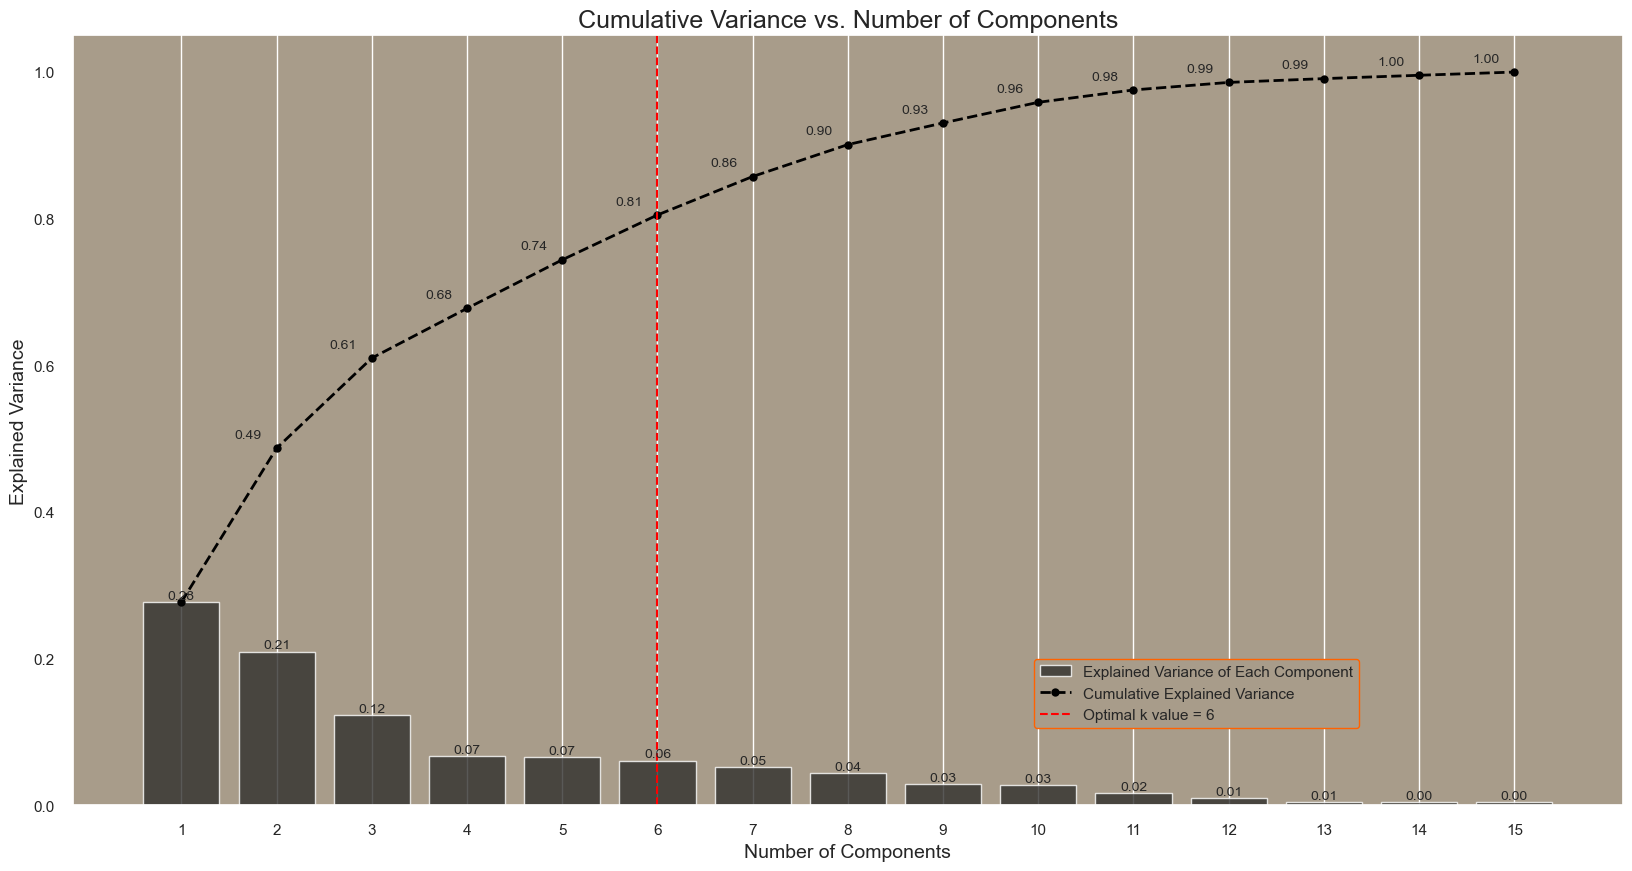

In [54]:
# Setting CustomerID as the index column
customer_data_scaled.set_index('CustomerID', inplace=True)

# Apply PCA
pca = PCA().fit(customer_data_scaled)

# Calculate the Cumulative Sum of the Explained Variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Set the optimal k value (based on our analysis, we can choose 6)
optimal_k = 6

# Set seaborn plot style
sns.set(rc={'axes.facecolor': '#a89c8a'}, style='darkgrid')

# Plot the cumulative explained variance against the number of components
plt.figure(figsize=(20, 10))

# Bar chart for the explained variance of each component
barplot = sns.barplot(x=list(range(1, len(cumulative_explained_variance) + 1)),
                      y=explained_variance_ratio,
                      color='#302f2d',
                      alpha=0.8)

# Line plot for the cumulative explained variance
lineplot, = plt.plot(range(0, len(cumulative_explained_variance)), cumulative_explained_variance,
                     marker='o', linestyle='--', color='black', linewidth=2)

# Plot optimal k value line
optimal_k_line = plt.axvline(optimal_k - 1, color='red', linestyle='--', label=f'Optimal k value = {optimal_k}') 

# Set labels and title
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Cumulative Variance vs. Number of Components', fontsize=18)

# Customize ticks and legend
plt.xticks(range(0, len(cumulative_explained_variance)))
plt.legend(handles=[barplot.patches[0], lineplot, optimal_k_line],
           labels=['Explained Variance of Each Component', 'Cumulative Explained Variance', f'Optimal k value = {optimal_k}'],
           loc=(0.62, 0.1),
           frameon=True,
           framealpha=1.0,  
           edgecolor='#ff6200')  

# Display the variance values for both graphs on the plots
x_offset = -0.3
y_offset = 0.01
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
    plt.text(i, ev_ratio, f"{ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)
    if i > 0:
        plt.text(i + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)

plt.grid(axis='both')   
plt.show()


The plot and the cumulative explained variance values provide insights into how much of the overall variance in the dataset is accounted for by each principal component, as well as the cumulative variance explained by considering the first n components.

Here are the key observations:

- The first principal component explains roughly 28% of the dataset's variance.

- The combination of the first two principal components accounts for approximately 49% of the variance.

- The first three principal components collectively explain about 61% of the variance, and so forth.

To determine the optimal number of components, it is common practice to identify a point where adding another component does not substantially increase the cumulative explained variance. This point is often referred to as the `elbow point` in the plot.

Upon examination of the plot, it becomes evident that the rate of increase in cumulative variance begins to plateau after the 6th component. This 6th component captures roughly 81% of the total variance.

Considering our objective of customer segmentation, it is important to retain a sufficient amount of information to effectively identify distinct customer groups. Therefore, retaining the first 6 components appears to strike a balance, as they collectively explain a significant portion of the total variance while reducing the dataset's dimensionality.

In [55]:
# Creating a PCA object with 6 components
pca = PCA(n_components=6)

# Fitting and transforming the original data to the new PCA dataframe
customer_data_pca = pca.fit_transform(customer_data_scaled)

# Creating a new dataframe from the PCA dataframe, with columns labeled PC1, PC2, etc.
customer_data_pca = pd.DataFrame(customer_data_pca, columns=['PC'+str(i+1) for i in range(pca.n_components_)])

# Adding the CustomerID index back to the new PCA dataframe
customer_data_pca.index = customer_data_scaled.index

In [56]:
# Displaying the resulting dataframe based on the PCs
customer_data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6
CustomerID,,,,,,
12346.0,-2.186469,-1.705370,-1.576745,1.008187,-0.411803,-1.658012
12347.0,3.290264,-1.387375,1.923310,-0.930990,-0.010591,0.873150
12348.0,0.584684,0.585019,0.664727,-0.655411,-0.470280,2.306657
12349.0,1.791116,-2.695652,5.850040,0.853418,0.677111,-1.520098
12350.0,-1.997139,-0.542639,0.578781,0.183682,-1.484838,0.062672


    Extract the coefficients corresponding to each principal component to better understand the transformation performed by PCA.

In [57]:
# Define a function to highlight the top 3 absolute values in each column of a dataframe
def highlight_top3(column):
    top3 = column.abs().nlargest(3).index
    return ['background-color:  #ffeacc' if i in top3 else '' for i in column.index]

# Create the PCA component DataFrame and apply the highlighting function
pc_df = pd.DataFrame(pca.components_.T, columns=['PC{}'.format(i+1) for i in range(pca.n_components_)],  
                     index=customer_data_scaled.columns)

pc_df.style.apply(highlight_top3, axis=0)

,PC1,PC2,PC3,PC4,PC5,PC6
Days_Since_Last_Purchase,-0.217859,-0.013986,0.067660,0.273430,-0.240968,-0.373059
Total_Transactions,0.380301,0.014759,-0.259180,-0.138165,-0.017356,-0.028257
Total_Products_Purchased,0.401425,0.007365,0.069133,-0.134806,0.057476,-0.013373
Total_Spend,0.431260,0.010159,0.065165,-0.092047,0.025202,-0.036947
Average_Transaction_Value,0.176225,-0.015544,0.589050,0.114307,0.021847,-0.101738
Unique_Products_Purchased,0.324992,0.063346,0.014010,-0.230502,-0.193981,0.124604
Average_Days_Between_Purchases,-0.022600,-0.036007,-0.127341,-0.160627,0.753462,0.211787
Day_Of_Week,-0.026572,0.994650,-0.006591,0.028870,0.058359,-0.060799
Hour,-0.024259,0.056388,-0.002019,-0.226832,-0.528881,0.621915
Is_UK,-0.001014,0.007435,-0.018378,-0.013419,-0.005353,0.014384


<a id="kmeans"></a>
# Machine Learning -> K-Means Clustering

<a id="optimal_k"></a>
## Determining the Optimal Number of Clusters

<a id="elbow"></a>
### Elbow Method


    The Elbow Method is a technique for identifying the ideal number of clusters in a dataset. It involves iterating through the data, generating clusters for various values of k. The k-means algorithm calculates the sum of squared distances between each data point and its assigned cluster centroid, known as the inertia or WCSS score. By plotting the inertia score against the k value, we create a graph that typically exhibits an elbow shape, hence the name "__Elbow Method__". The __elbow point__ represents the k-value where the reduction in inertia achieved by increasing k becomes negligible, indicating the optimal stopping point for the number of clusters.

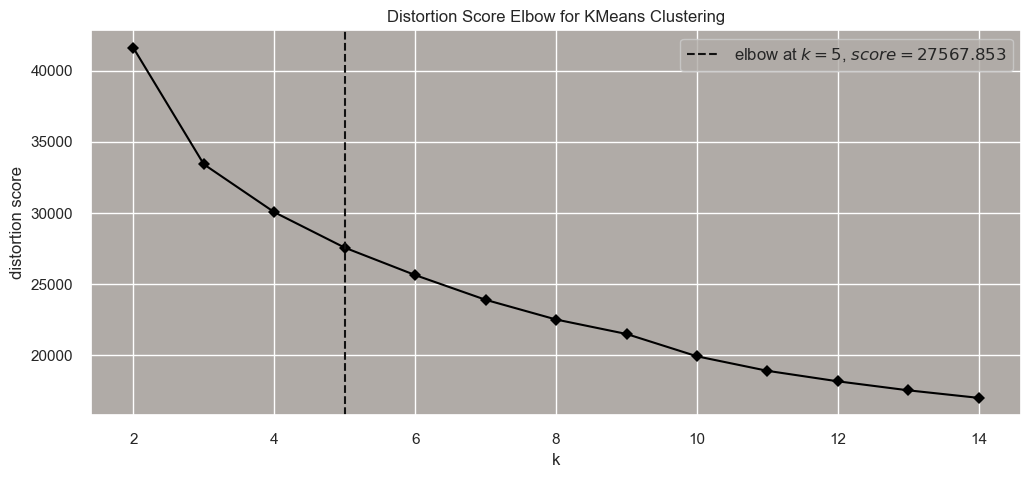

In [58]:
# Set plot style, and background color
sns.set(style='darkgrid', rc={'axes.facecolor': '#b0aba7'})

# Set the color palette for the plot
sns.set_palette(['black'])

# Instantiate the clustering model with the specified parameters
km = KMeans(init='k-means++', n_init=10, max_iter=100, random_state=0)

# Create a figure and axis with the desired size
fig, ax = plt.subplots(figsize=(12, 5))

# Instantiate the KElbowVisualizer with the model and range of k values, and disable the timing plot
visualizer = KElbowVisualizer(km, k=(2, 15), timings=False, ax=ax)

# Fit the data to the visualizer
visualizer.fit(customer_data_pca)

# Finalize and render the figure
visualizer.show();

    The optimal value of k for the KMeans clustering algorithm can be found at the elbow point. Using the YellowBrick library for the Elbow method, we observe that the suggested optimal k value is 5. However, we don't have a very distinct elbow point in this case, which is common in real-world data. From the plot, we can see that the inertia continues to decrease significantly up to k=5, indicating that the optimum value of k could be between 3 and 7. To choose the best k within this range, we can employ the silhouette analysis, another cluster quality evaluation method. Additionally, incorporating business insights can help determine a practical k value.

<a id="silhouette"></a>
### Silhouette Method


    The Silhouette Method is an approach to find the optimal number of clusters in a dataset by evaluating the consistency within clusters and their separation from other clusters. It computes the silhouette coefficient for each data point, which measures how similar a point is to its own cluster compared to other clusters.


In the following analysis:

- Initially choose a range of 2-6 for the number of clusters (k) based on the Elbow method from the previous section. Next, plot __Silhouette scores__ for each k value to determine the one with the highest score.


- Subsequently, to fine-tune the selection of the most appropriate k, generate __Silhouette plots__ that visually display the __silhouette coefficients for each data point within various clusters__.

In [59]:
def silhouette_analysis(df, start_k, stop_k, figsize=(15, 16)):
    """
    Perform Silhouette analysis for a range of k values and visualize the results
    """

    # Set the size of the figure
    plt.figure(figsize=figsize)

    # Create a grid with (stop_k - start_k + 1) rows and 2 columns
    grid = gridspec.GridSpec(stop_k - start_k + 1, 2)

    # Assign the first plot to the first row and both columns
    first_plot = plt.subplot(grid[0, :])

    # First plot: Silhouette scores for different k values
    # Updated color palette to 'autumn'
    sns.set_palette(['#440154', '#21918c', '#fde725'])

    silhouette_scores = []

    # Iterate through the range of k values
    for k in range(start_k, stop_k + 1):
        km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=0)
        km.fit(df)
        labels = km.predict(df)
        score = silhouette_score(df, labels)
        silhouette_scores.append(score)

    best_k = start_k + silhouette_scores.index(max(silhouette_scores))

    plt.plot(range(start_k, stop_k + 1), silhouette_scores, marker='o', color='black')
    plt.xticks(range(start_k, stop_k + 1))
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette score')
    plt.title('Average Silhouette Score for Different k Values', fontsize=15)

    # Add the optimal k value text with a different background color
    optimal_k_text = f'The k value with the highest Silhouette score is: {best_k}'
    plt.text(10, 0.23, optimal_k_text, fontsize=12, verticalalignment='bottom', 
             horizontalalignment='left', bbox=dict(facecolor='lightyellow', edgecolor='gold', boxstyle='round, pad=0.5'))

    # Second plot (subplot): Silhouette plots for each k value
    colors = sns.color_palette(['#440154', '#21918c', '#fde725'])

    for i in range(start_k, stop_k + 1):    
        km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=0)
        row_idx, col_idx = divmod(i - start_k, 2)

        # Assign the plots to the subsequent rows
        ax = plt.subplot(grid[row_idx + 1, col_idx])

        visualizer = SilhouetteVisualizer(km, colors=colors, ax=ax)
        visualizer.fit(df)

        # Add the Silhouette score text with a green color
        score = silhouette_score(df, km.labels_)
        ax.text(0.97, 0.02, f'Silhouette Score: {score:.2f}', fontsize=12, \
                ha='right', transform=ax.transAxes, color='black')

        ax.set_title(f'Silhouette Plot for {i} Clusters', fontsize=15)

    plt.tight_layout()
    plt.show()


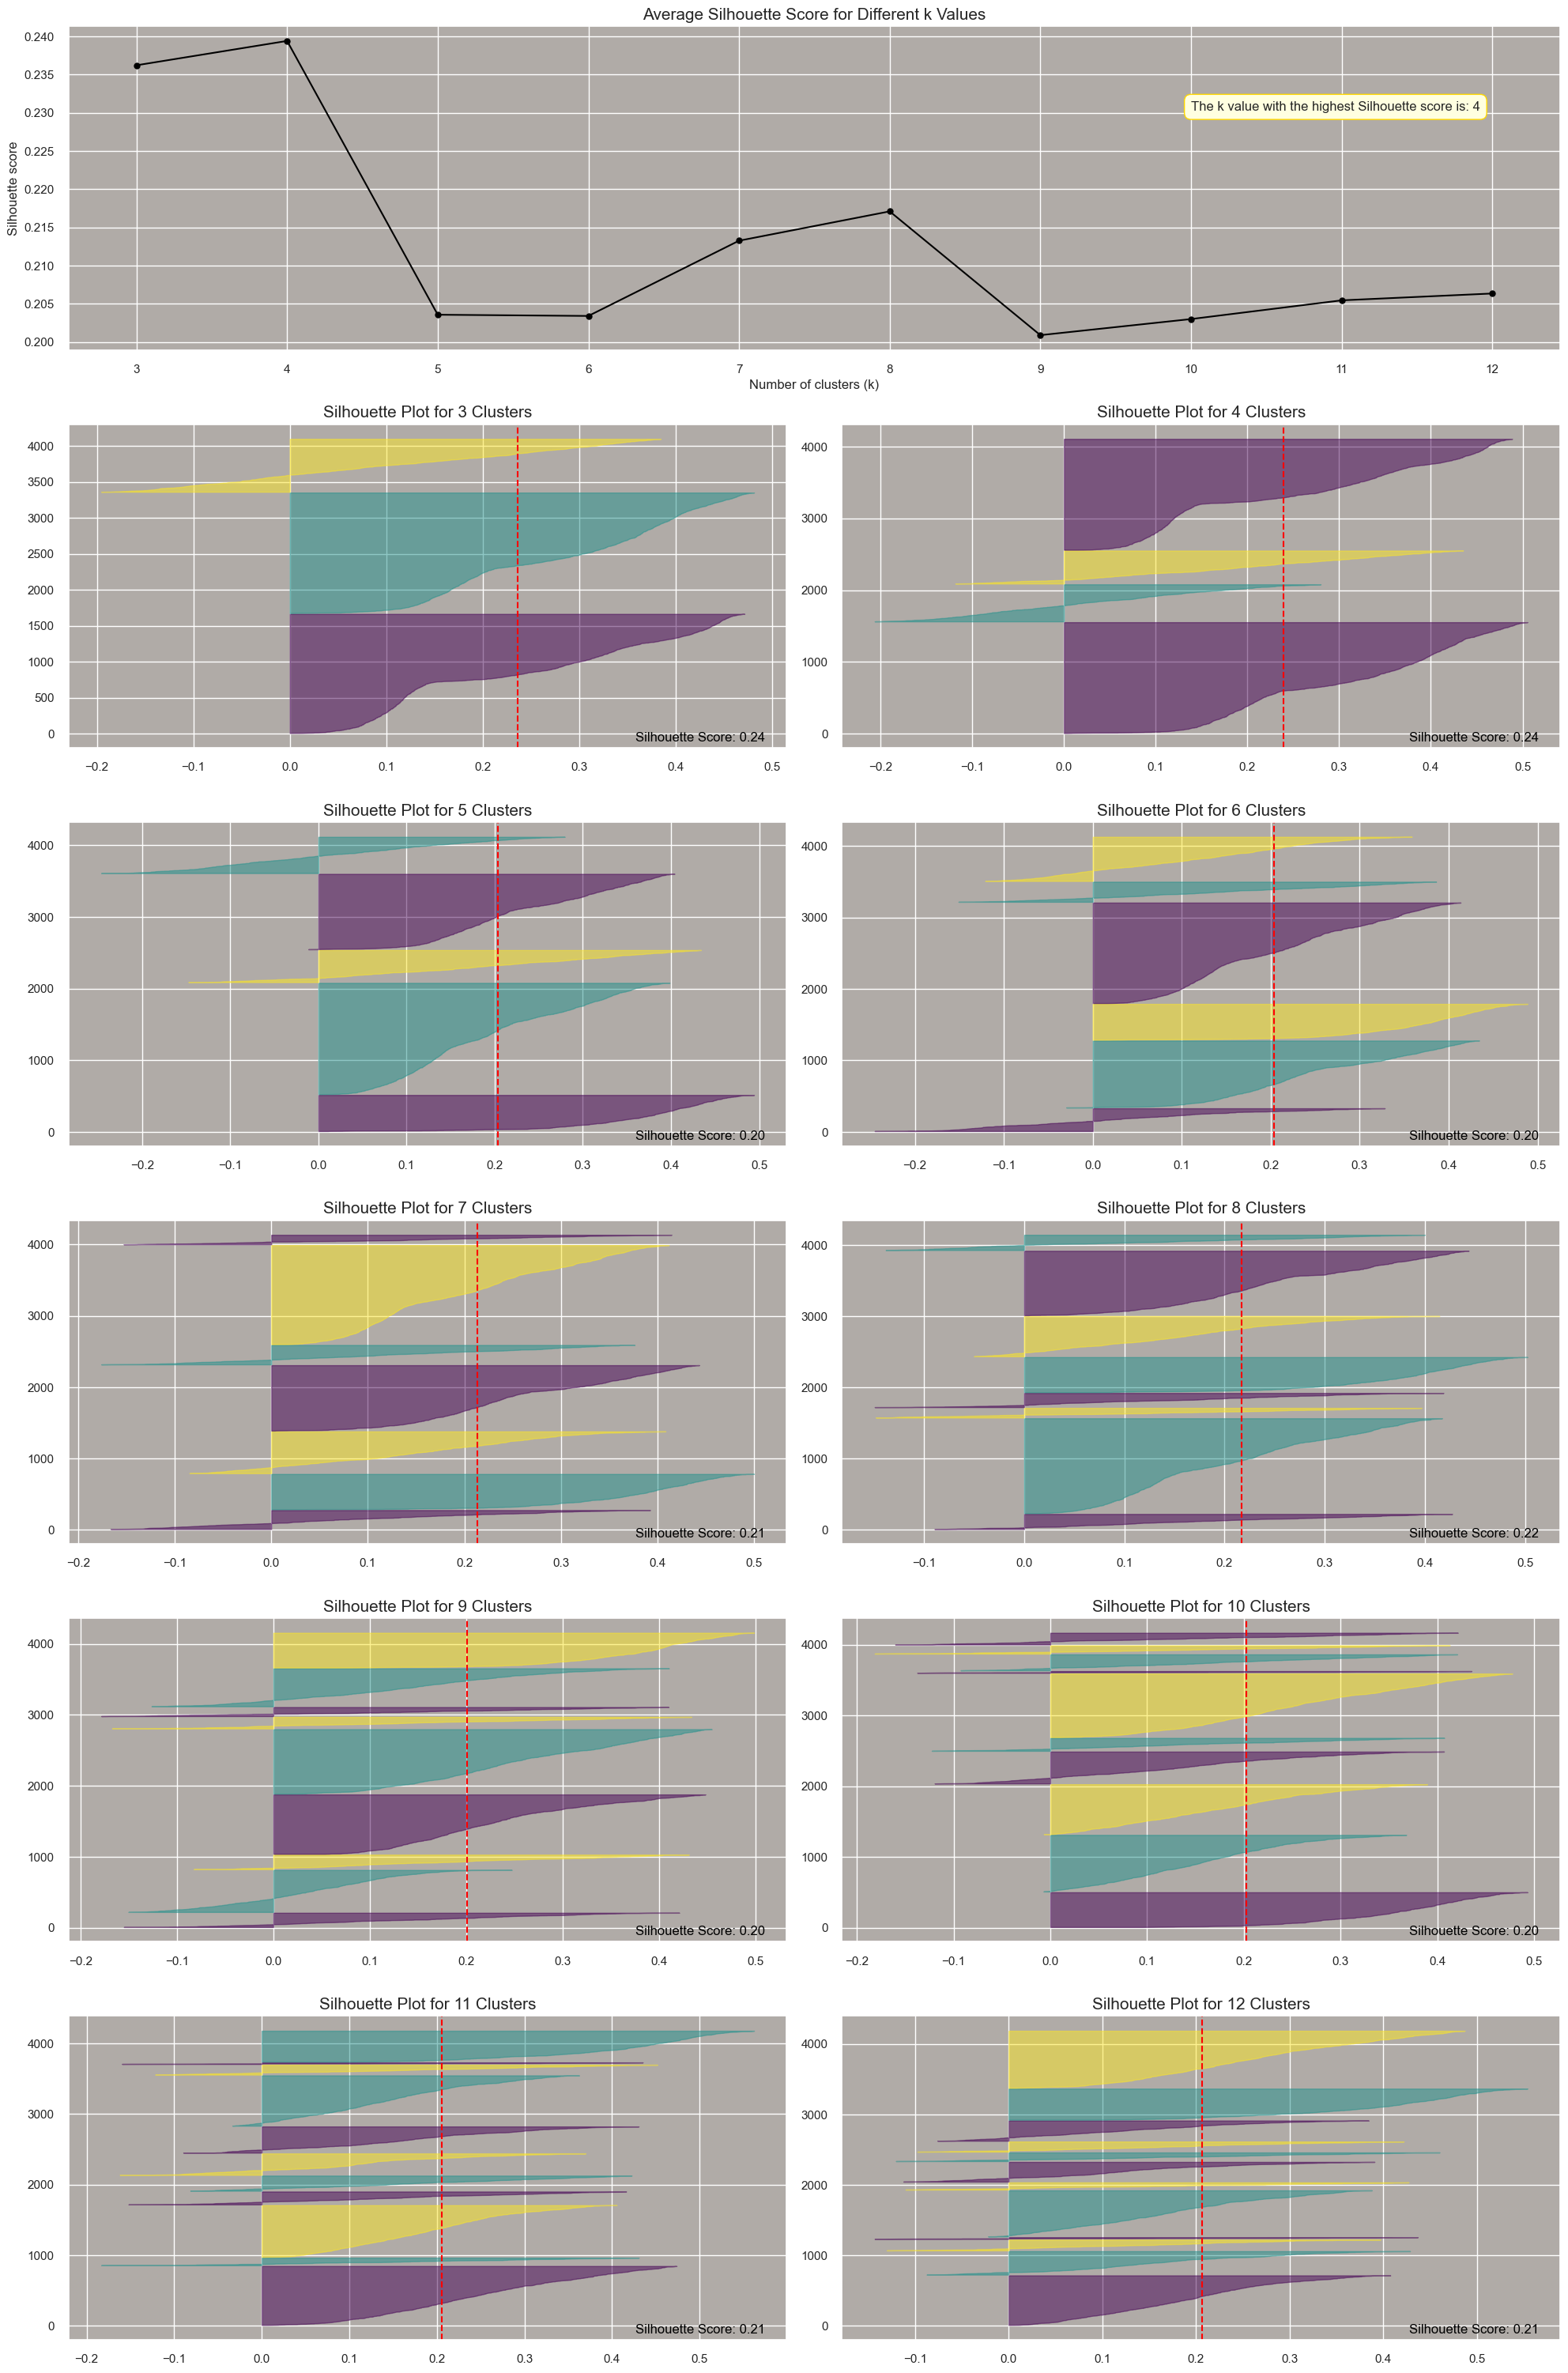

In [60]:
silhouette_analysis(customer_data_pca, 3, 12, figsize=(20, 50))

    It's clear that choosing k = 3 is the better option. This choice gives us clusters that are more evenly matched and well-defined, making our clustering solution stronger and more reliable.

<a id="kmeans_model"></a>
## Clustering Model - K-means


    In this step,apply the K-means clustering algorithm to segment customers into different clusters based on their purchasing behaviors and other characteristics, using the optimal number of clusters determined in the previous step.

    It's important to note that the K-means algorithm might assign different labels to the clusters in each run. To address this, we have taken an additional step to swap the labels based on the frequency of samples in each cluster, ensuring a consistent label assignment across different runs.

In [61]:
# Apply KMeans clustering using the optimal k
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=100, random_state=0)
kmeans.fit(customer_data_pca)

# Get the frequency of each cluster
cluster_frequencies = Counter(kmeans.labels_)

# Create a mapping from old labels to new labels based on frequency
label_mapping = {label: new_label for new_label, (label, _) in 
                 enumerate(cluster_frequencies.most_common())}

# Reverse the mapping to assign labels as per your criteria
label_mapping = {v: k for k, v in {2: 1, 1: 0, 0: 2}.items()}

# Apply the mapping to get the new labels
new_labels = np.array([label_mapping[label] for label in kmeans.labels_])

# Append the new cluster labels back to the original dataset
customer_data_cleaned['cluster'] = new_labels

# Append the new cluster labels to the PCA version of the dataset
customer_data_pca['cluster'] = new_labels

In [62]:
# Display the first few rows of the original dataframe
customer_data_cleaned.head()

,CustomerID,Days_Since_Last_Purchase,Total_Transactions,Total_Products_Purchased,Total_Spend,Average_Transaction_Value,Unique_Products_Purchased,Average_Days_Between_Purchases,Day_Of_Week,Hour,Is_UK,Cancellation_Frequency,Cancellation_Rate,Monthly_Spending_Mean,Monthly_Spending_Std,Spending_Trend,cluster
0,12346.0,325,2,0,0.0,0.0,1,0.0,1,10,1,1,0.5,0.0,0.0,0.0,2
1,12347.0,2,7,2458,4310.0,615.714286,103,2.016575,1,14,0,0,0.0,615.714286,341.070789,4.486071,0
2,12348.0,75,4,2332,1437.24,359.31,21,10.884615,3,19,0,0,0.0,359.31,203.875689,-100.884,1
3,12349.0,18,1,630,1457.55,1457.55,72,0.0,0,9,0,0,0.0,1457.55,0.0,0.0,2
4,12350.0,310,1,196,294.4,294.4,16,0.0,2,16,0,0,0.0,294.4,0.0,0.0,2


<a id="evaluation"></a>
#  Clustering Evaluation

After determining the optimal number of clusters, which in our case is 3 as determined through elbow and silhouette analyses, the next step is evaluation. This phase is crucial for validating the quality of the formed clusters, ensuring they are both well-defined and distinct. Here is an overview of the evaluation methods and visualization techniques I plan to utilize:

- **3D Visualization of Top Principal Components**: This visualization will help us visualize the clusters in a three-dimensional space using the top principal components.

- **Cluster Distribution Visualization**: This technique allows us to visually represent the distribution of data points within each cluster.

- **Evaluation Metrics**: Several evaluation metrics will be employed to assess the quality of the clustering, including:
    - `Silhouette Score`
    - `Calinski Harabasz Score`
    - `Davies Bouldin Score`
    
    
**Note**: We are conducting the evaluation in the PCA-transformed space of the dataset. This choice is deliberate because it represents the space where the clusters were originally formed, capturing the most significant data patterns. Evaluating in this space provides a more accurate assessment of cluster quality, helping us understand the cohesion and separation achieved during clustering. Furthermore, this approach facilitates a clearer 3D visualization using the top principal components, allowing us to visualize the actual separation between clusters.

In [63]:
# Setting up the color scheme for the clusters 
colors = ['#440154', '#21918c', '#fde725']

In [64]:
# Create separate data frames for each cluster
cluster_0 = customer_data_pca[customer_data_pca['cluster'] == 0]
cluster_1 = customer_data_pca[customer_data_pca['cluster'] == 1]
cluster_2 = customer_data_pca[customer_data_pca['cluster'] == 2]

# Create a 3D scatter plot
fig = go.Figure()

# Add data points for each cluster separately and specify the color
fig.add_trace(go.Scatter3d(x=cluster_0['PC1'], y=cluster_0['PC2'], z=cluster_0['PC3'], 
                           mode='markers', marker=dict(color=colors[0], size=5, opacity=0.4), name='Cluster 0'))
fig.add_trace(go.Scatter3d(x=cluster_1['PC1'], y=cluster_1['PC2'], z=cluster_1['PC3'], 
                           mode='markers', marker=dict(color=colors[1], size=5, opacity=0.4), name='Cluster 1'))
fig.add_trace(go.Scatter3d(x=cluster_2['PC1'], y=cluster_2['PC2'], z=cluster_2['PC3'], 
                           mode='markers', marker=dict(color=colors[2], size=5, opacity=0.4), name='Cluster 2'))

# Set the title and layout details
fig.update_layout(
    title=dict(text='3D Visualization of Customer Clusters in PCA Space', x=0.5),
    scene=dict(
        xaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC1'),
        yaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC2'),
        zaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC3'),
    ),
    width=900,
    height=800
)

# Show the plot
fig.show()

    Utilize a bar plot to visualize the percentage of customers in each cluster, which helps in understanding if the clusters are balanced and significant.

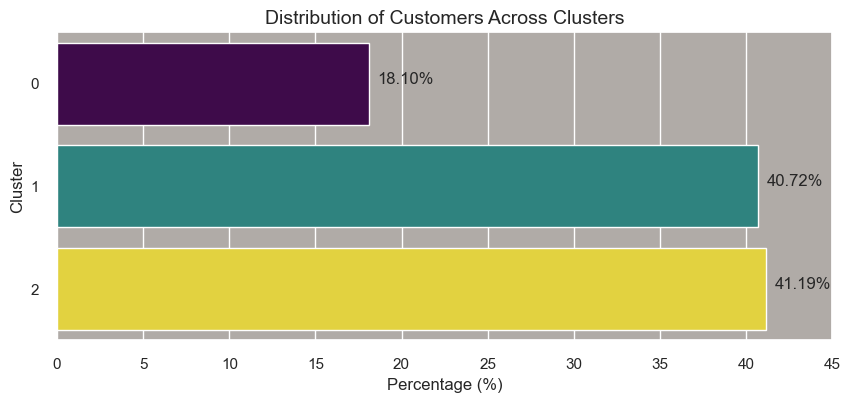

In [65]:
# Calculate the percentage of customers in each cluster
cluster_percentage = (customer_data_pca['cluster'].value_counts(normalize=True) * 100).reset_index()
cluster_percentage.columns = ['Cluster', 'Percentage']
cluster_percentage.sort_values(by='Cluster', inplace=True)

# Create a horizontal bar plot
plt.figure(figsize=(10, 4))
sns.barplot(x='Percentage', y='Cluster', data=cluster_percentage, orient='h', palette=colors)

# Adding percentages on the bars
for index, value in enumerate(cluster_percentage['Percentage']):
    plt.text(value+0.5, index, f'{value:.2f}%')

plt.title('Distribution of Customers Across Clusters', fontsize=14)
plt.xticks(ticks=np.arange(0, 50, 5))
plt.xlabel('Percentage (%)')

# Show the plot
plt.show()

   
    The distribution of customers across the clusters, as depicted by the bar plot, suggests a fairly balanced distribution with clusters 1 and 2 holding around 41% of customers each and cluster 2 accommodating approximately 18% of the customers. 

    This balanced distribution indicates that our clustering process has been largely successful in identifying meaningful patterns within the data, rather than merely grouping noise or outliers. It implies that each cluster represents a substantial and distinct segment of the customer base, thereby offering valuable insights for future business strategies.

    Moreover, the fact that no cluster contains a very small percentage of customers, assures us that each cluster is significant and not just representing outliers or noise in the data. This setup allows for a more nuanced understanding and analysis of different customer segments, facilitating effective and informed decision-making.


To assess the quality of our clustering, we will utilize the following evaluation metrics:

- **Silhouette Score**: This metric measures the separation distance between clusters. Higher Silhouette Scores indicate better separation between clusters, with values ranging from -1 to 1.


- **Calinski Harabasz Score**: The Calinski Harabasz Score is employed to evaluate the dispersion both within and between clusters. A higher score indicates more well-defined clusters.


- **Davies Bouldin Score**: This score assesses the average similarity between each cluster and its most similar neighboring cluster. Lower Davies Bouldin Scores indicate better separation between clusters.

In [66]:
# Compute number of customers
num_observations = len(customer_data_pca)

# Separate the features and the cluster labels
X = customer_data_pca.drop('cluster', axis=1)
clusters = customer_data_pca['cluster']

# Compute the metrics
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Create a table to display the metrics and the number of observations
table_data = [
    ["Number of Observations", num_observations],
    ["Silhouette Score", sil_score],
    ["Calinski Harabasz Score", calinski_score],
    ["Davies Bouldin Score", davies_score]
]

# Print the table
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+-------------------------+--------------------+
|         Metric          |       Value        |
+-------------------------+--------------------+
| Number of Observations  |        4067        |
|    Silhouette Score     | 0.2362284801709889 |
| Calinski Harabasz Score | 1257.1747766540645 |
|  Davies Bouldin Score   | 1.3682695376074658 |
+-------------------------+--------------------+


***Clustering Quality Inference***
    
    
- The __Silhouette Score__ of approximately 0.236, although not close to 1, still indicates a fair amount of separation between the clusters. It suggests that the clusters are somewhat distinct, but there might be slight overlaps between them. Generally, a score closer to 1 would be ideal, indicating more distinct and well-separated clusters.

    
- The __Calinski Harabasz Score__ is 1257.17, which is considerably high, indicating that the clusters are well-defined. A higher score in this metric generally signals better cluster definitions, thus implying that our clustering has managed to find substantial structure in the data.

    
- The __Davies Bouldin Score__ of 1.37 is a reasonable score, indicating a moderate level of similarity between each cluster and its most similar one. A lower score is generally better as it indicates less similarity between clusters, and thus, our score here suggests a decent separation between the clusters.


In conclusion, the metrics suggest that the clustering is of good quality, with clusters being well-defined and fairly separated. However, there might still be room for further optimization to enhance cluster separation and definition, potentially by trying other clustering and dimensionality reduction algorithms.



<a id="profiling"></a>
# Cluster Analysis and Profiling

Analyze the characteristics of each cluster to understand the distinct behaviors and preferences of different customer segments and also profile each cluster to identify the key traits that define the customers in each cluster.

***Radar Chart Approach***

First of all, create radar charts to visualize the centroid values of each cluster across different features. This can give a quick visual comparison of the profiles of different clusters.To construct the radar charts, it's essential to first compute the centroid for each cluster. This centroid represents the mean value for all features within a specific cluster. Subsequently, display these centroids on the radar charts, facilitating a clear visualization of the central tendencies of each feature across the various clusters:

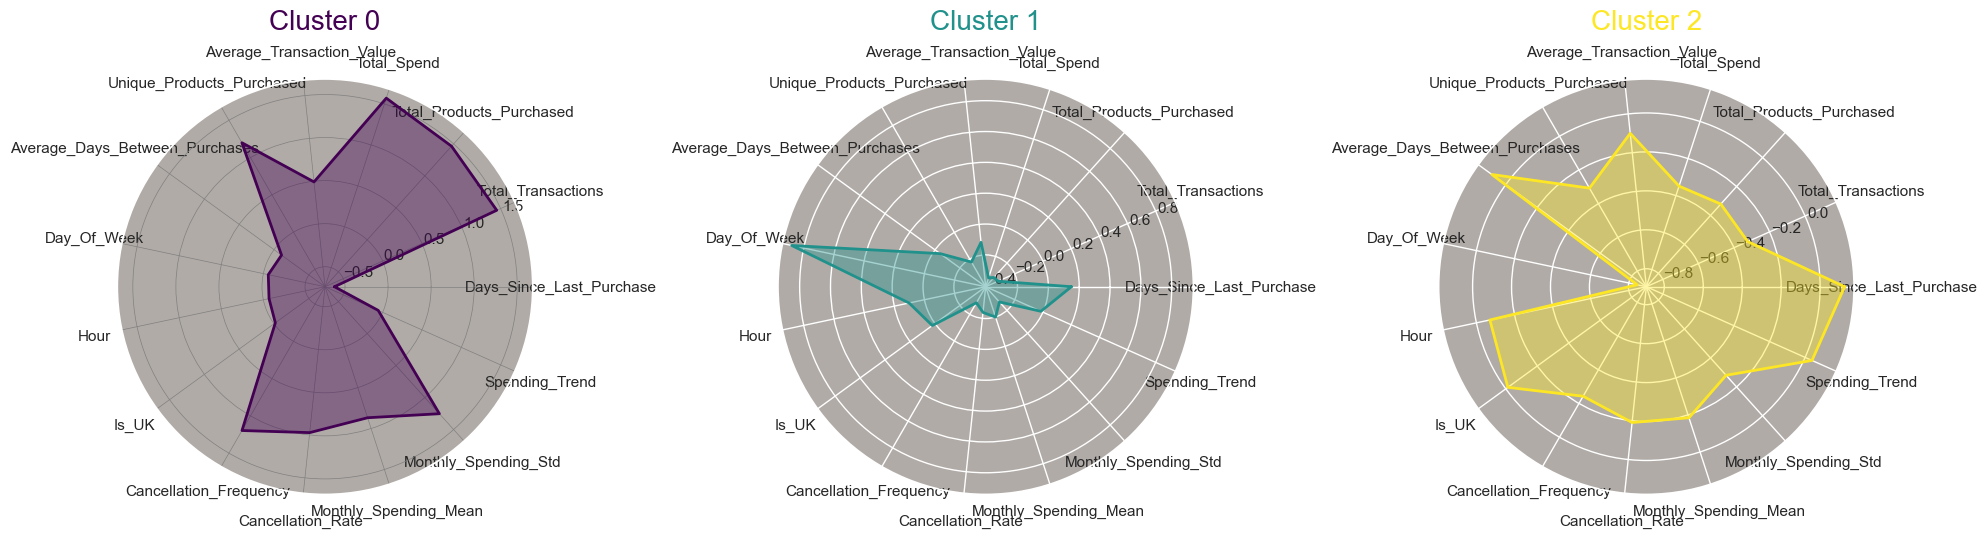

In [67]:
# Setting 'CustomerID' column as index and assigning it to a new dataframe
df_customer = customer_data_cleaned.set_index('CustomerID')

# Standardize the data (excluding the cluster column)
scaler = StandardScaler()
df_customer_standardized = scaler.fit_transform(df_customer.drop(columns=['cluster'], axis=1))

# Create a new dataframe with standardized values and add the cluster column back
df_customer_standardized = pd.DataFrame(df_customer_standardized, columns=df_customer.columns[:-1], index=df_customer.index)
df_customer_standardized['cluster'] = df_customer['cluster']

# Calculate the centroids of each cluster
cluster_centroids = df_customer_standardized.groupby('cluster').mean()

# Function to create a radar chart
def create_radar_chart(ax, angles, data, color, cluster):
    # Plot the data and fill the area
    ax.fill(angles, data, color=color, alpha=0.4)
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')
    
    # Add a title
    ax.set_title(f'Cluster {cluster}', size=20, color=color, y=1.1)

# Set data
labels=np.array(cluster_centroids.columns)
num_vars = len(labels)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is circular, so we need to "complete the loop" and append the start to the end
labels = np.concatenate((labels, [labels[0]]))
angles += angles[:1]

# Initialize the figure
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw=dict(polar=True), nrows=1, ncols=3)

# Create radar chart for each cluster
for i, color in enumerate(colors):
    data = cluster_centroids.loc[i].tolist()
    data += data[:1]  # Complete the loop
    create_radar_chart(ax[i], angles, data, color, i)

# Add input data
ax[0].set_xticks(angles[:-1])
ax[0].set_xticklabels(labels[:-1])

ax[1].set_xticks(angles[:-1])
ax[1].set_xticklabels(labels[:-1])

ax[2].set_xticks(angles[:-1])
ax[2].set_xticklabels(labels[:-1])

# Add a grid
ax[0].grid(color='grey', linewidth=0.5)

# Display the plot
plt.tight_layout()
plt.show()

***Customer Profiles Derived from Radar Chart Analysis***
    
Cluster 0:

__Frequent High-Spenders with a High Rate of Cancellations__
    
- Customers in this cluster are characterized by their high spending levels and significant total spend, often purchasing a diverse range of unique products.
- They engage in frequent transactions but also have a high frequency of cancellations and a high cancellation rate.
- These customers exhibit a short average time between purchases and tend to shop early in the day (`Hour` value).
- Their monthly spending displays high variability, suggesting less predictable spending patterns compared to other clusters.
- Despite their high spending, they show a declining spending trend, indicating that their spending levels may be decreasing over time.

____
    
Cluster 1:   
 
__Sporadic Shoppers with a Preference for Weekend Shopping__  

- Customers in this cluster tend to spend less, make fewer transactions, and purchase fewer products.
- They exhibit a slight inclination to shop on weekends, as evidenced by a high `Day_of_Week` value.
- Their spending pattern is relatively stable but on the lower side, with low monthly spending variation (`Monthly_Spending_Std`).
- These customers engage in fewer cancellations, indicating a low cancellation frequency and rate.
- On average, their transaction values are lower, suggesting that they tend to spend less per transaction.  

____
    
Cluster 2:

__Infrequent Big Spenders with a High Spending Trend__  
    
- Customers in this cluster display a moderate level of spending but less frequent transactions, as evidenced by high values for `Days_Since_Last_Purchase` and `Average_Days_Between_Purchases`.
- They exhibit a strong upward spending trend, indicating that their spending has been consistently increasing.
- These customers tend to shop later in the day and are primarily located in the UK.
- They have a moderate level of transaction cancellations, with a medium cancellation frequency and rate.
- The average transaction value for this group is relatively high, indicating substantial purchases when they do shop.


***Histogram Chart Approach***

   To validate the profiles identified from the radar charts, histograms are plotted for each feature segmented by the cluster labels. These histograms will allow us to visually inspect the distribution of feature values within each cluster, thereby confirming or refining the profiles we have created based on the radar charts.

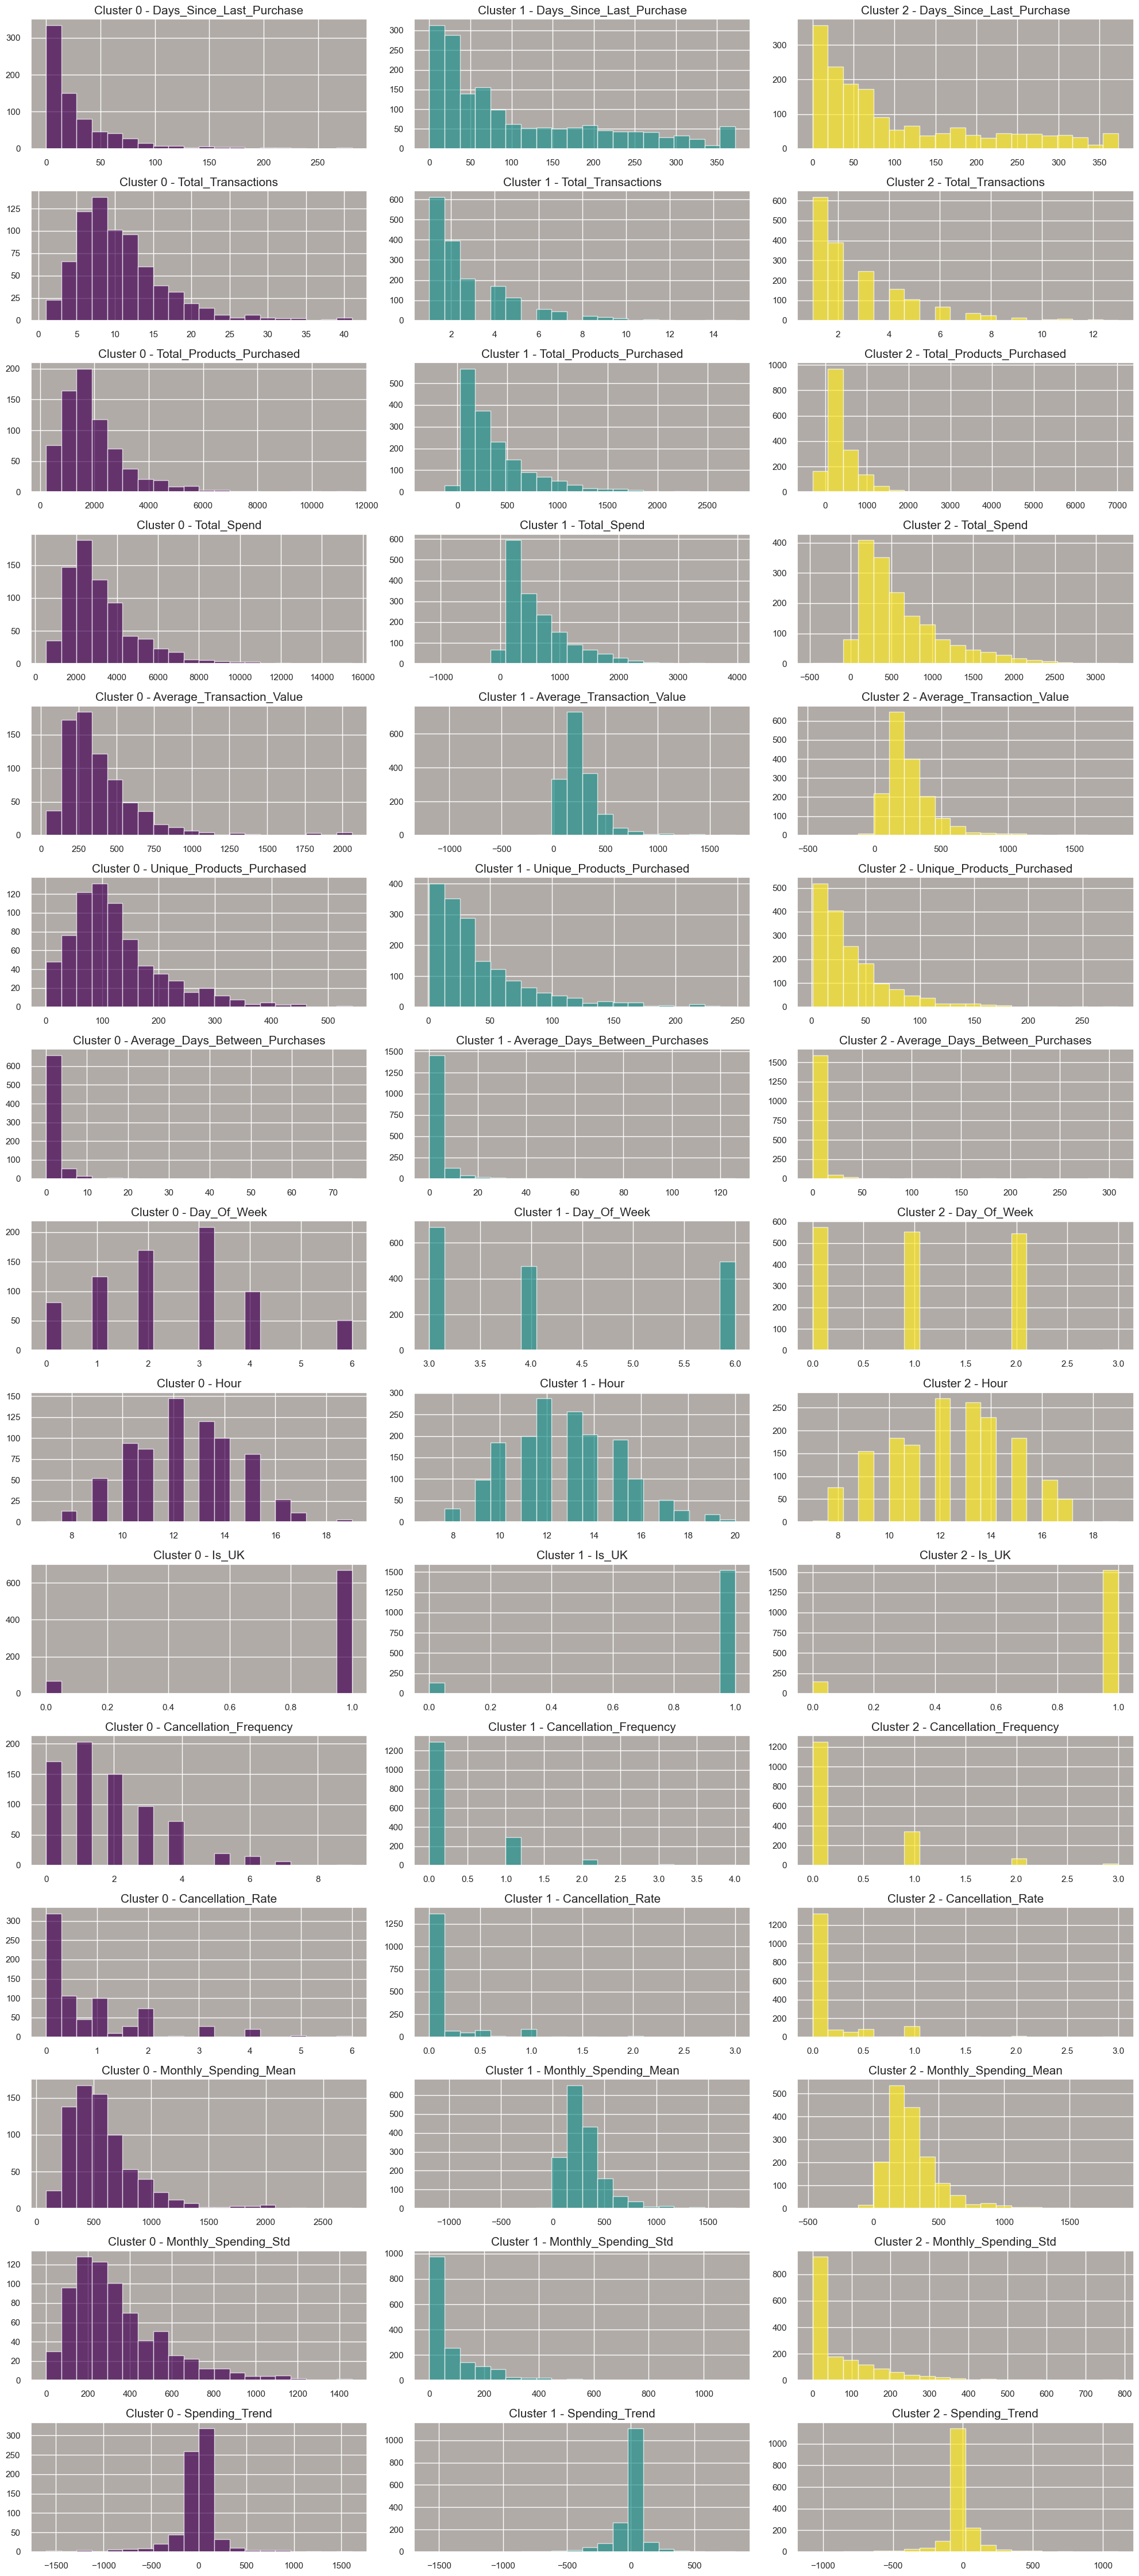

In [68]:
# Plot histograms for each feature segmented by the clusters
features = customer_data_cleaned.columns[1:-1]
clusters = customer_data_cleaned['cluster'].unique()
clusters.sort()

# Setting up the subplots
n_rows = len(features)
n_cols = len(clusters)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 3*n_rows))

# Plotting histograms
for i, feature in enumerate(features):
    for j, cluster in enumerate(clusters):
        data = customer_data_cleaned[customer_data_cleaned['cluster'] == cluster][feature]
        axes[i, j].hist(data, bins=20, color=colors[j], edgecolor='w', alpha=0.7)
        axes[i, j].set_title(f'Cluster {cluster} - {feature}', fontsize=15)
        axes[i, j].set_xlabel('')
        axes[i, j].set_ylabel('')

# Adjusting layout to prevent overlapping
plt.tight_layout()
plt.show()

The detailed insights from the histograms provide a more nuanced understanding of each cluster, helping in refining the profiles to represent the customer behaviors more accurately. Based on the detailed analysis from both the radar charts and the histograms, here are the refined profiles and titles for each cluster:

`Cluster 0 - Eager Early-Bird Shoppers`:
- Customers in this cluster are characterized by their high spending habits. They tend to buy a wide array of unique products and engage in numerous transactions.
- Despite their high expenditure, they have a tendency to cancel a significant portion of their transactions, possibly indicating impulsive buying behaviors.
- They usually shop during the early hours of the day, perhaps finding time before their daily commitments or taking advantage of early bird deals.
- Their spending patterns are quite variable, with high fluctuations in their monthly spending, indicating a less predictable shopping pattern.
- Interestingly, their spending trend is showing a slight decrease, which might signal a future change in their shopping habits.

`Cluster 1 - Casual Weekend Shoppers`:
- Customers in this cluster usually shop less frequently and spend less money compared to the other clusters.
- They generally have a smaller number of transactions and buy fewer products.
- These customers have a preference for shopping during the weekends, possibly engaging in casual or window shopping.
- Their spending habits are quite stable over time, showing little fluctuation in their monthly spending.
- They rarely cancel their transactions, indicating a more decisive shopping behavior.
- When they do shop, their spending per transaction tends to be lower compared to other clusters.

`Cluster 2 - Occasional Big Spenders`:
- Customers in this cluster don't shop frequently but tend to spend a considerable amount when they do, buying a variety of products.
- Their spending has been on the rise, indicating a growing interest or investment in their purchases.
- They prefer to shop later in the day, possibly after work hours, and are mainly based in the UK.
- They have a moderate tendency to cancel transactions, which might be due to their higher spending; they perhaps reconsider their purchases more often.
- Their purchases are generally substantial, indicating a preference for quality or premium products.



<a id="recommendation_system"></a>
# Recommendation System

In the final stage of this project, a recommendation system is being developed to improve the online shopping experience. This system will recommend products to customers based on their purchase patterns within their specific clusters. Previously in the project, during the preparation of customer data, a small portion (5%) of customers were identified as outliers and were separated into a dataset named `outliers_data`.

Now, the focus is on analyzing the cleaned data of the main 95% of customers to identify the most popular products in each cluster. Using this information, the system will create personalized recommendations, suggesting the top three products that are popular in their cluster but have not been purchased by them yet. This approach not only supports targeted marketing efforts but also enhances the personal shopping experience, potentially increasing sales. For the outlier group, a simple strategy of recommending random products can be implemented as an initial way to engage them.

In [69]:
# Step 1: Extract and remove transactions of outlier customers from the main dataset
outlier_ids = outliers_data['CustomerID'].astype('float').unique()
main_data = df[~df['CustomerID'].isin(outlier_ids)]

In [70]:
# Step 2: Standardize CustomerID data type for merging
customer_data_cleaned['CustomerID'] = customer_data_cleaned['CustomerID'].astype('float')

In [71]:
# Step 3: Combine transaction and customer data to include cluster information per transaction
combined_data = main_data.merge(customer_data_cleaned[['CustomerID', 'cluster']], on='CustomerID', how='inner')

In [72]:
# Step 4: Determine top 10 selling products in each cluster by total quantity
cluster_best_sellers = combined_data.groupby(['cluster', 'StockCode', 'Description'])['Quantity'].sum().reset_index()
cluster_best_sellers = cluster_best_sellers.sort_values(by=['cluster', 'Quantity'], ascending=[True, False])
top_cluster_products = cluster_best_sellers.groupby('cluster').head(10)

In [73]:
# Step 5: Track individual customer purchases in each cluster
customer_buys = combined_data.groupby(['CustomerID', 'cluster', 'StockCode'])['Quantity'].sum().reset_index()


In [74]:
# Step 6: Formulate product recommendations for each customer based on their cluster
recommendations_list = []
for cluster in top_cluster_products['cluster'].unique():
    cluster_top_items = top_cluster_products[top_cluster_products['cluster'] == cluster]
    cluster_customers = customer_data_cleaned[customer_data_cleaned['cluster'] == cluster]['CustomerID']
    
    for customer in cluster_customers:
        purchased_items = customer_buys[(customer_buys['CustomerID'] == customer) & 
                                        (customer_buys['cluster'] == cluster)]['StockCode'].tolist()
        
        unowned_top_items = cluster_top_items[~cluster_top_items['StockCode'].isin(purchased_items)]
        top_3_unowned = unowned_top_items.head(3)
        
        recommendations_list.append([customer, cluster] + top_3_unowned[['StockCode', 'Description']].values.flatten().tolist())


In [75]:
# Step 7: Convert recommendations to dataframe and integrate with existing customer data
final_recommendations = pd.DataFrame(recommendations_list, columns=['CustomerID', 'cluster', 'Recommendation1_StockCode', 'Recommendation1_Description', \
                                                 'Recommendation2_StockCode', 'Recommendation2_Description', 'Recommendation3_StockCode', 'Recommendation3_Description'])
final_customer_data = customer_data_cleaned.merge(final_recommendations, on=['CustomerID', 'cluster'], how='right')


In [76]:
# Show 20 randomly selected entries from the recommendations section of the dataframe
final_customer_data.set_index('CustomerID').iloc[:, -6:].sample(n=20, random_state=0)


,Recommendation1_StockCode,Recommendation1_Description,Recommendation2_StockCode,Recommendation2_Description,Recommendation3_StockCode,Recommendation3_Description
CustomerID,,,,,,
13243.0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,84879,ASSORTED COLOUR BIRD ORNAMENT,15036,ASSORTED COLOURS SILK FAN
13232.0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,84879,ASSORTED COLOUR BIRD ORNAMENT,15036,ASSORTED COLOURS SILK FAN
14997.0,18007,ESSENTIAL BALM 3.5G TIN IN ENVELOPE,84879,ASSORTED COLOUR BIRD ORNAMENT,17003,BROCADE RING PURSE
14948.0,18007,ESSENTIAL BALM 3.5G TIN IN ENVELOPE,84879,ASSORTED COLOUR BIRD ORNAMENT,17003,BROCADE RING PURSE
12596.0,18007,ESSENTIAL BALM 3.5G TIN IN ENVELOPE,84879,ASSORTED COLOUR BIRD ORNAMENT,17003,BROCADE RING PURSE
16686.0,22616,PACK OF 12 LONDON TISSUES,85099B,JUMBO BAG RED RETROSPOT,84879,ASSORTED COLOUR BIRD ORNAMENT
17101.0,18007,ESSENTIAL BALM 3.5G TIN IN ENVELOPE,84879,ASSORTED COLOUR BIRD ORNAMENT,17003,BROCADE RING PURSE
14954.0,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,84879,ASSORTED COLOUR BIRD ORNAMENT,15036,ASSORTED COLOURS SILK FAN
18123.0,18007,ESSENTIAL BALM 3.5G TIN IN ENVELOPE,84879,ASSORTED COLOUR BIRD ORNAMENT,17003,BROCADE RING PURSE


<a id="references"></a>
## References

- Deep Learning based Recommender System: A Survey and New Perspectives (Shuai Zhang, Lina Yao, Aixin Sun, and Yi Tay, 2018): Overview of deep learning techniques for recommendation.
- Neural Collaborative Filtering (He et al., 2017): A deep learning approach to collaborative filtering.
- Peng, Y. (2022). A Survey on Modern Recommendation System based on Big Data. ArXiv./abs/2206.02631
- F. Zhou, B. Luo, T. Hu, Z. Chen, and Y. Wen, “A combinatorial recommendation system framework based on deep reinforcement learning,” in 2021 IEEE International Conference on Big Data (Big Data). IEEE, 2021, pp. 5733–5740.
- A. Gazdar and L. Hidri, “A new similarity measure for collaborative filtering based recommender systems,” Knowledge-Based Systems, vol. 188, p. 105058, 2020.
- Carrie1. E-commerce Data. Kaggle. https://www.kaggle.com/datasets/carrie1/ecommerce-data/data
- AmyKagg. (2019). Starter e-commerce data [Kaggle notebook]. https://www.kaggle.com/code/amykagg/starter-e-commerce-data-1dc04828-4